In [237]:

import seaborn as sns
import pandas as pd
main_df = pd.read_csv("Service_calls.csv")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

/var/folders/h2/t53d34217g9dz7wj1c7sg4300000gn/T/ipykernel_89047/3897108601.py:3: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  main_df = pd.read_csv("Service_calls.csv")


In [238]:
main_df.head()

,ADDRESS_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,PRIORITY,PRIORITY_COLOR,ARRIVAL_TIME_PRIMARY_UNIT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,BEAT,DISTRICT,SNA_NEIGHBORHOOD,CPD_NEIGHBORHOOD,COMMUNITY_COUNCIL_NEIGHBORHOOD,LATITUDE_X,LONGITUDE_X
0,12XX PURCELL AV,CPD,11/15/2021 11:03:58 PM,INV: INV,CPD211115001474,MHRT,MENTALLY IMPAIRED NON VIOL,11.0,BLUE,11/15/2021 11:13:48 PM,11/15/2021 11:46:53 PM,11/15/2021 11:10:17 PM,P321,3.0,NaN,EAST PRICE HILL,EAST PRICE HILL,39.112992,-84.564666
1,46XX RAPID RUN RD,CPD,11/15/2021 11:03:34 PM,ADV:ADVISED,CPD211115001473,ADV,ADVISED INCIDENT,35.0,PURPLE,NaN,11/15/2021 11:03:34 PM,NaN,P321,3.0,NaN,WEST PRICE HILL,WEST PRICE HILL,39.113506,-84.593472
2,3XX EZZARD CHARLES DR,CPD,11/15/2021 11:00:58 PM,TRAN: TRANSPORT,CPD211115001472,PRIS,PRISONER PICK UP,34.0,PURPLE,NaN,11/15/2021 11:41:59 PM,11/15/2021 11:01:37 PM,P131,1.0,NaN,WEST END,WEST END,39.109602,-84.521819
3,XX E MCMICKEN AV,CPD,11/15/2021 11:00:01 PM,INV: INV,CPD211115001470,DIRPAT,DIRECTED PATROL - VEHICLE,27.0,PURPLE,11/15/2021 11:28:55 PM,11/15/2021 11:31:51 PM,11/15/2021 11:20:39 PM,P121,1.0,NaN,OVER-THE-RHINE,OTR,39.115838,-84.516012
4,19XX BALTIMORE AV,CPD,11/15/2021 10:59:48 PM,REPO: REPO,CPD211115001469,REPO,TOWED VEH - FOR RECORDS USE ONLY,35.0,PURPLE,NaN,11/15/2021 11:01:12 PM,NaN,P351,3.0,NaN,ENGLISH WOODS,NORTH FAIRMOUNT,39.138031,-84.559785


In [239]:
df_calls = main_df[['CREATE_TIME_INCIDENT','INCIDENT_TYPE_ID','SNA_NEIGHBORHOOD']].copy()

In [240]:
df_calls.describe()


,CREATE_TIME_INCIDENT,INCIDENT_TYPE_ID,SNA_NEIGHBORHOOD
count,3140963,3020051,2391638
unique,3058903,320,50
top,09/03/2021 10:00:01 PM,DIRPAT,WESTWOOD
freq,8,276540,185706


In [241]:
df_sample = df_calls.loc[(df_calls['INCIDENT_TYPE_ID'] == 'GUN') | (df_calls['INCIDENT_TYPE_ID'] == "SPOTS") | (df_calls['INCIDENT_TYPE_ID'] == "SHOTS")].copy()

In [242]:
df_sample.head()

,CREATE_TIME_INCIDENT,INCIDENT_TYPE_ID,SNA_NEIGHBORHOOD
38,11/15/2021 10:17:32 PM,GUN,NaN
74,11/15/2021 09:38:50 PM,SPOTS,NaN
86,11/15/2021 09:24:22 PM,SHOTS,NaN
115,11/15/2021 08:54:21 PM,SHOTS,NaN
118,11/15/2021 08:52:27 PM,SHOTS,NaN


In [243]:
df_sample[['Date', 'Time','AM/PM']] = df_sample.CREATE_TIME_INCIDENT.str.split(" ", expand = True)

In [244]:
df_sample.head()

,CREATE_TIME_INCIDENT,INCIDENT_TYPE_ID,SNA_NEIGHBORHOOD,Date,Time,AM/PM
38,11/15/2021 10:17:32 PM,GUN,NaN,11/15/2021,10:17:32,PM
74,11/15/2021 09:38:50 PM,SPOTS,NaN,11/15/2021,09:38:50,PM
86,11/15/2021 09:24:22 PM,SHOTS,NaN,11/15/2021,09:24:22,PM
115,11/15/2021 08:54:21 PM,SHOTS,NaN,11/15/2021,08:54:21,PM
118,11/15/2021 08:52:27 PM,SHOTS,NaN,11/15/2021,08:52:27,PM


In [245]:
df_sample[['Month', 'Day','Year']] = df_sample.Date.str.split("/", expand = True)

In [246]:
df_sample
new_sample = df_sample[['INCIDENT_TYPE_ID','Month']]

value_counts = new_sample.groupby(['Month','INCIDENT_TYPE_ID']).size().unstack()
value_counts

INCIDENT_TYPE_ID,GUN,SHOTS,SPOTS
Month,,,
01,887,1875,1476
02,738,1389,697
03,999,1860,850
04,1204,2197,955
05,1437,2625,1236
06,1469,2315,1319
07,1512,1745,1575
08,1413,1841,1622
09,1395,2049,1564


<Axes: title={'center': 'Number of gun related incident calls  v/s Month in Cincinnati'}, xlabel='Month', ylabel='Count'>

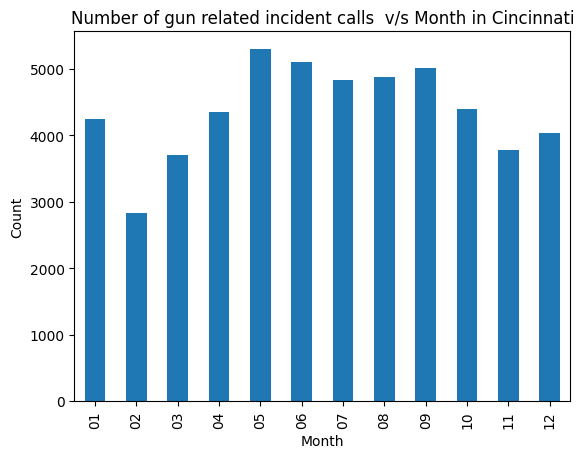

In [247]:
df_sample['Month'].value_counts().sort_index(ascending=True).plot(kind = 'bar', title = "Number of gun related incident calls  v/s Month in Cincinnati", xlabel="Month",ylabel="Count")


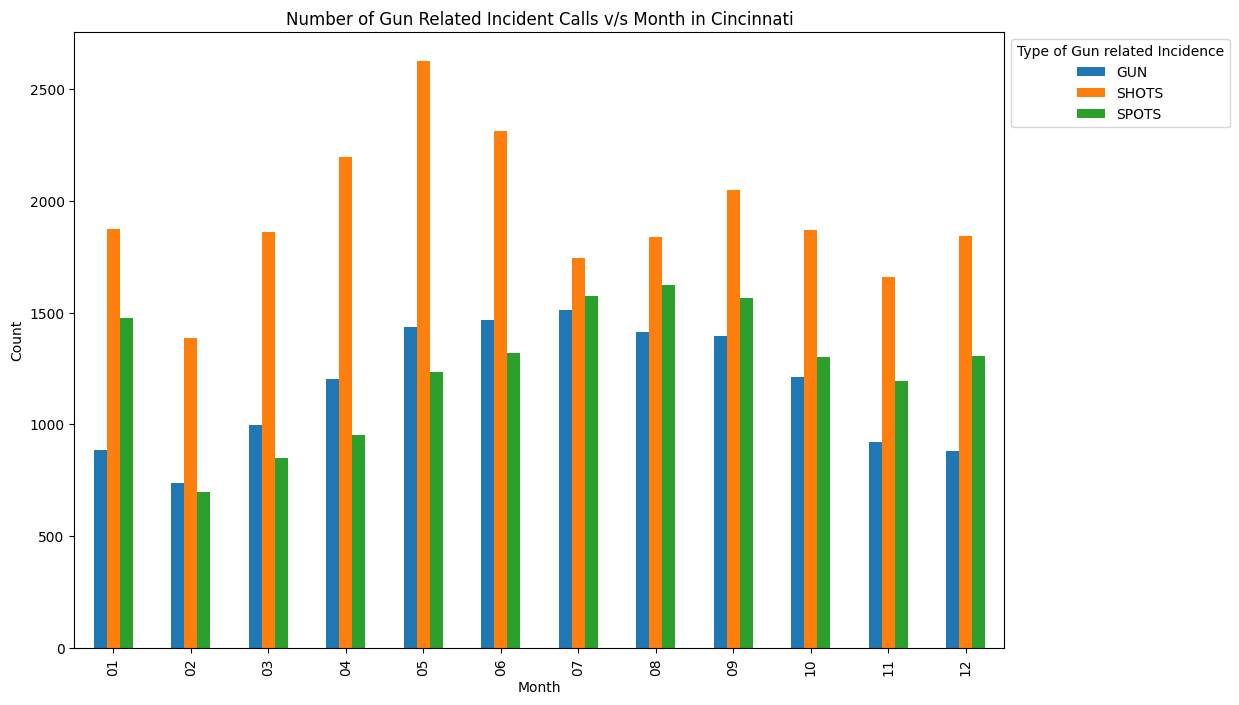

In [249]:

plot1 = value_counts.plot(kind = 'bar',figsize = (12,8), xlabel = "Month", ylabel = "Count", title = "Number of Gun Related Incident Calls v/s Month in Cincinnati")
plot1.legend(["GUN","SHOTS","SPOTS"])
plot1.legend(title='Type of Gun related Incidence', bbox_to_anchor=(1, 1), loc='upper left')

In [250]:
incident_main_df = pd.read_csv("Incidents.csv")

In [251]:
incident_main_df['WEAPONS'].value_counts()

99 - NONE                                                      34665
40 - PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)               12060
U - UNKNOWN                                                     6621
12 - HANDGUN                                                    5042
11 - FIREARM (TYPE NOT STATED)                                  2620
80 - OTHER WEAPON                                               1833
30 - BLUNT OBJECT (CLUB, HAMMER, ETC.)                          1527
20 - KNIFE/CUTTING INSTRUMENT (ICEPICK, AX, ETC.)               1095
35 - MOTOR VEHICLE (WHEN USED AS WEAPON)                         412
18 - BB AND PELLET GUNS                                          169
13 - RIFLE                                                       140
12A - AUTOMATIC HANDGUN                                          140
15 - OTHER FIREARM                                                70
15B - SEMI-AUTOMATIC ASSAULT FIREARM                              47
14 - SHOTGUN                      

In [252]:
incident_main_df[['Code', 'Weapons']] = incident_main_df.WEAPONS.str.split(" - ", expand = True)


In [253]:
gun_incident = incident_main_df.loc[(incident_main_df['Code'] == '12') | (incident_main_df['Code'] == '11') | (incident_main_df['Code'] == '18') | (incident_main_df['Code'] == '13')| (incident_main_df['Code'] == '12A')|(incident_main_df['Code'] == '15')| (incident_main_df['Code'] == '15B')|(incident_main_df['Code'] == '14') | (incident_main_df['Code'] == '16') | (incident_main_df['Code'] == '13A') | (incident_main_df['Code'] == '13B') | (incident_main_df['Code'] == '17') | (incident_main_df['Code'] == '15A')].copy()

In [254]:
gun_incident['WEAPONS'].value_counts()

12 - HANDGUN                                             5042
11 - FIREARM (TYPE NOT STATED)                           2620
18 - BB AND PELLET GUNS                                   169
12A - AUTOMATIC HANDGUN                                   140
13 - RIFLE                                                140
15 - OTHER FIREARM                                         70
15B - SEMI-AUTOMATIC ASSAULT FIREARM                       47
14 - SHOTGUN                                               38
16 - IMITATION FIREARM                                     30
13A - FULLY AUTOMATIC RIFLE                                10
13B - OTHER FULLY AUTOMATIC FIREARM (TYPE NOT STATED)      10
17 - SIMULATED FIREARM                                      6
15A - SEMI-AUTOMATIC SPORTING RIFLE                         2
Name: WEAPONS, dtype: int64

In [255]:
gun_incident[['Date','Time','AM/PM']] = gun_incident.DATE_REPORTED.str.split(" ", expand = True)


In [256]:
del gun_incident['DATE_REPORTED']


In [257]:
gun_incident[['Month','Day','Year']] = gun_incident.Date.str.split("/", expand = True)

In [258]:
gun_incident.head()

,WEAPONS,SNA_NEIGHBORHOOD,Code,Weapons,Date,Time,AM/PM,Month,Day,Year
14,12 - HANDGUN,SOUTH CUMMINSVILLE,12,HANDGUN,11/06/2019,07:02:30,AM,11,06,2019
15,12 - HANDGUN,SOUTH CUMMINSVILLE,12,HANDGUN,11/06/2019,07:02:30,AM,11,06,2019
16,12 - HANDGUN,SOUTH CUMMINSVILLE,12,HANDGUN,11/06/2019,07:02:30,AM,11,06,2019
17,12 - HANDGUN,SOUTH CUMMINSVILLE,12,HANDGUN,11/06/2019,07:02:30,AM,11,06,2019
28,12 - HANDGUN,MILLVALE,12,HANDGUN,11/06/2019,12:13:28,PM,11,06,2019


<Axes: title={'center': 'Number of gun related incident report v/s Month in Cincinnati'}, xlabel='Month', ylabel='Count'>

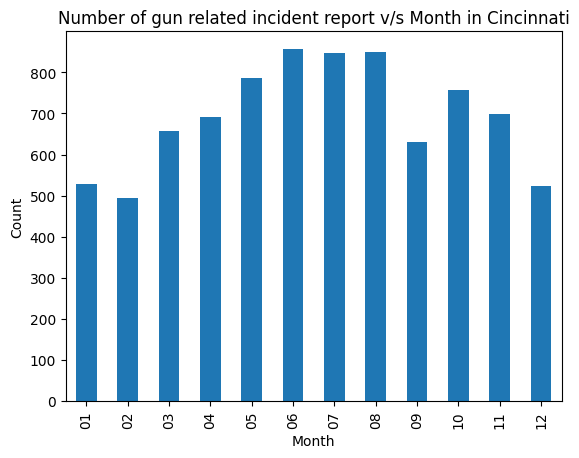

In [259]:
gun_incident['Month'].value_counts().sort_index(ascending=True).plot(kind = 'bar', title = "Number of gun related incident report v/s Month in Cincinnati", xlabel="Month",ylabel="Count")

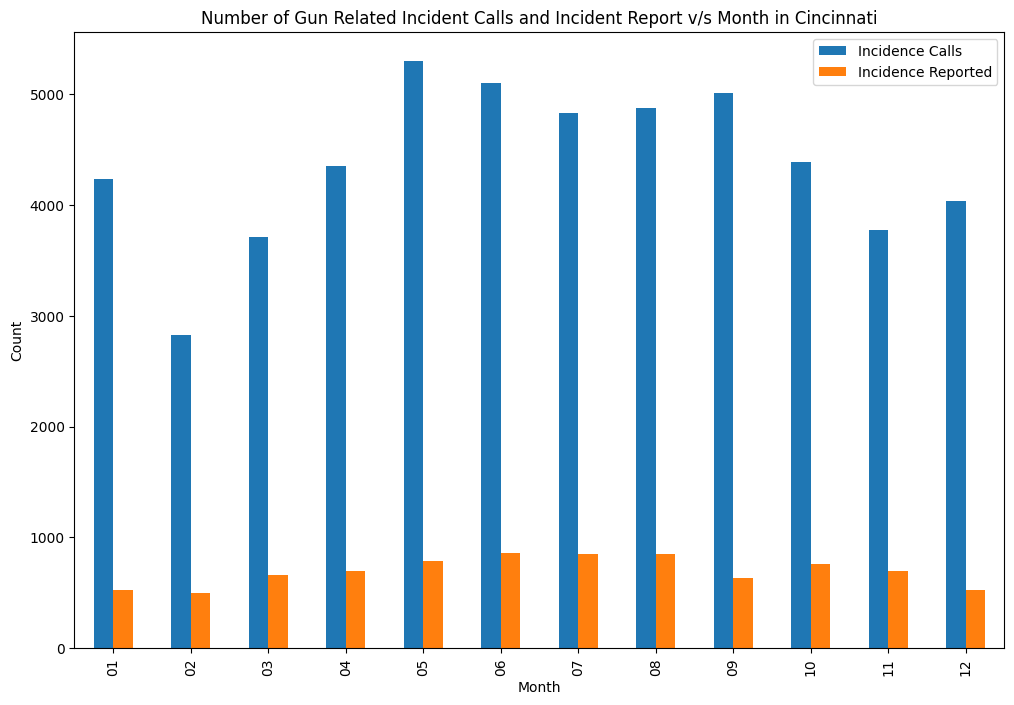

In [260]:
new_sample = df_sample[['Month']]
value_counts_incidence = pd.DataFrame(new_sample.groupby(['Month']).size())
value_counts_report = pd.DataFrame(gun_incident.groupby(['Month']).size())

#value_counts_incidence[['Month','Count']] = value_counts_incidence.str.split(" ", expand = True)
value_counts_incidence

#value_counts_incidence.plot()
df_combined = pd.merge(value_counts_incidence, value_counts_report,right_index = True, left_index = True)
plot2 = df_combined.plot(kind = 'bar',figsize = (12,8), xlabel = "Month", ylabel = "Count", title = "Number of Gun Related Incident Calls and Incident Report v/s Month in Cincinnati")
plot2.legend(["Incidence Calls","Incidence Reported"])
plot1.legend(title='Type of Gun related Incidence', bbox_to_anchor=(1, 1), loc='upper left')

In [261]:
neighborhood_plot=gun_incident['SNA_NEIGHBORHOOD'].dropna()
neighborhood_plot = neighborhood_plot.unique()
neighborhood_plot.sort()
neighborhood_plot

array(['AVONDALE', 'BOND HILL', 'CALIFORNIA', 'CAMP WASHINGTON',
       'CARTHAGE', 'CLIFTON', 'COLLEGE HILL', 'CORRYVILLE', 'CUF',
       'DOWNTOWN', 'EAST END', 'EAST PRICE HILL', 'EAST WALNUT HILLS',
       'EAST WESTWOOD', 'ENGLISH WOODS', 'EVANSTON', 'HARTWELL',
       'HYDE PARK', 'KENNEDY HEIGHTS', 'LINWOOD', 'LOWER PRICE HILL',
       'MADISONVILLE', 'MILLVALE', 'MT. AIRY', 'MT. AUBURN',
       'MT. LOOKOUT', 'MT. WASHINGTON', 'NORTH AVONDALE - PADDOCK HILLS',
       'NORTH FAIRMOUNT', 'NORTHSIDE', 'OAKLEY', 'OVER-THE-RHINE',
       'PENDLETON', 'PLEASANT RIDGE', 'QUEENSGATE', 'RIVERSIDE',
       'ROSELAWN', 'SAYLER PARK', 'SEDAMSVILLE', 'SOUTH CUMMINSVILLE',
       'SOUTH FAIRMOUNT', 'SPRING GROVE VILLAGE', 'VILLAGES AT ROLL HILL',
       'WALNUT HILLS', 'WEST END', 'WEST PRICE HILL', 'WESTWOOD',
       'WINTON HILLS'], dtype=object)

/Users/riwazp/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


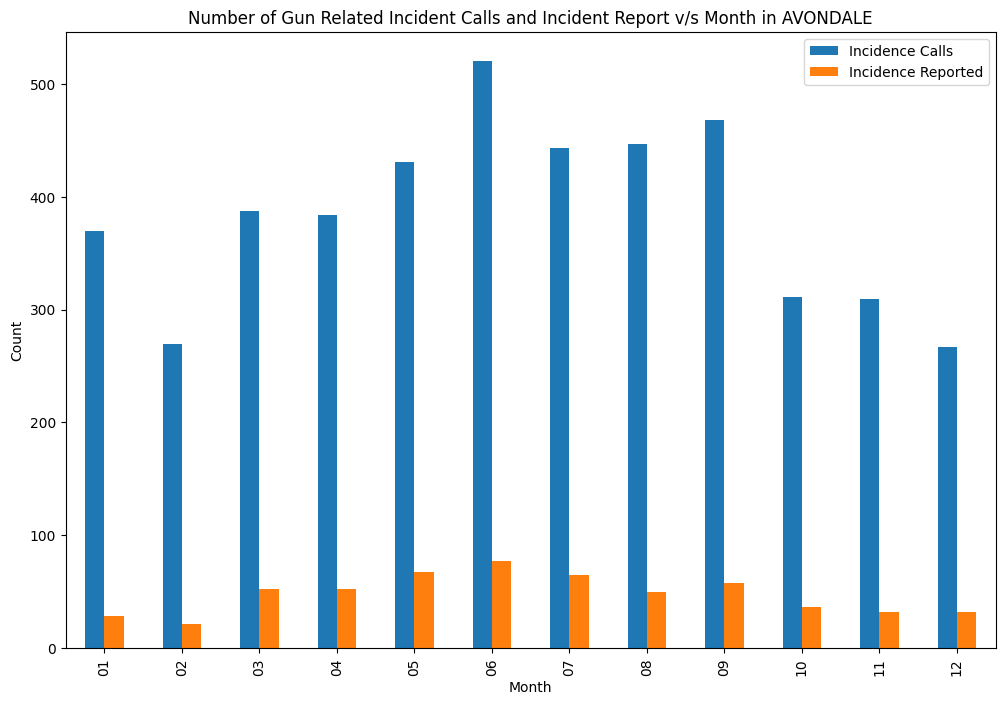

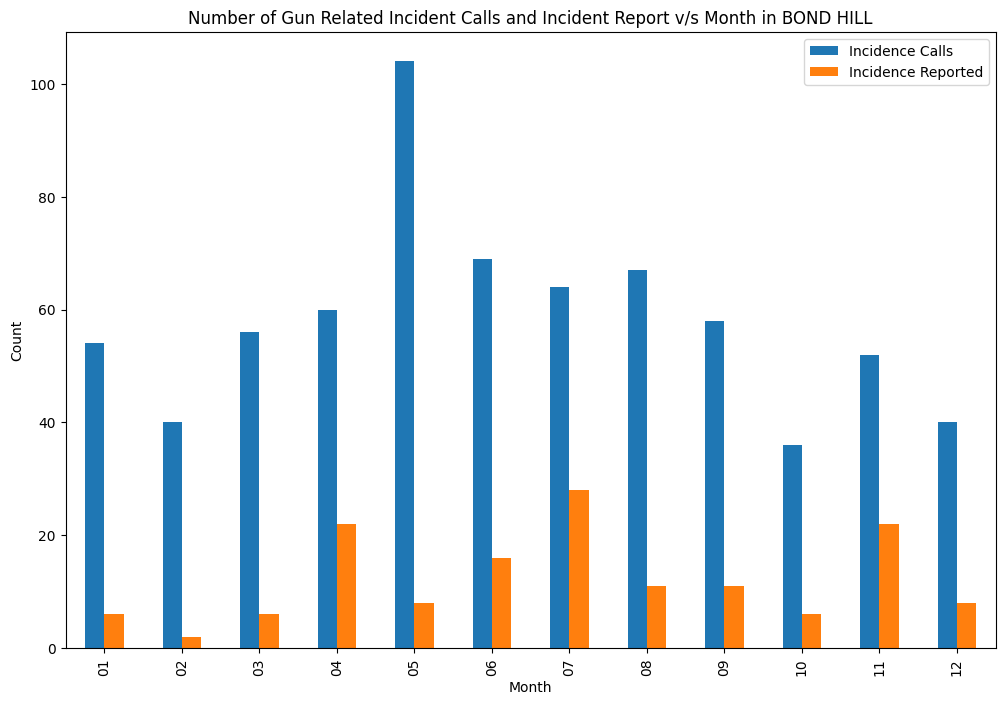

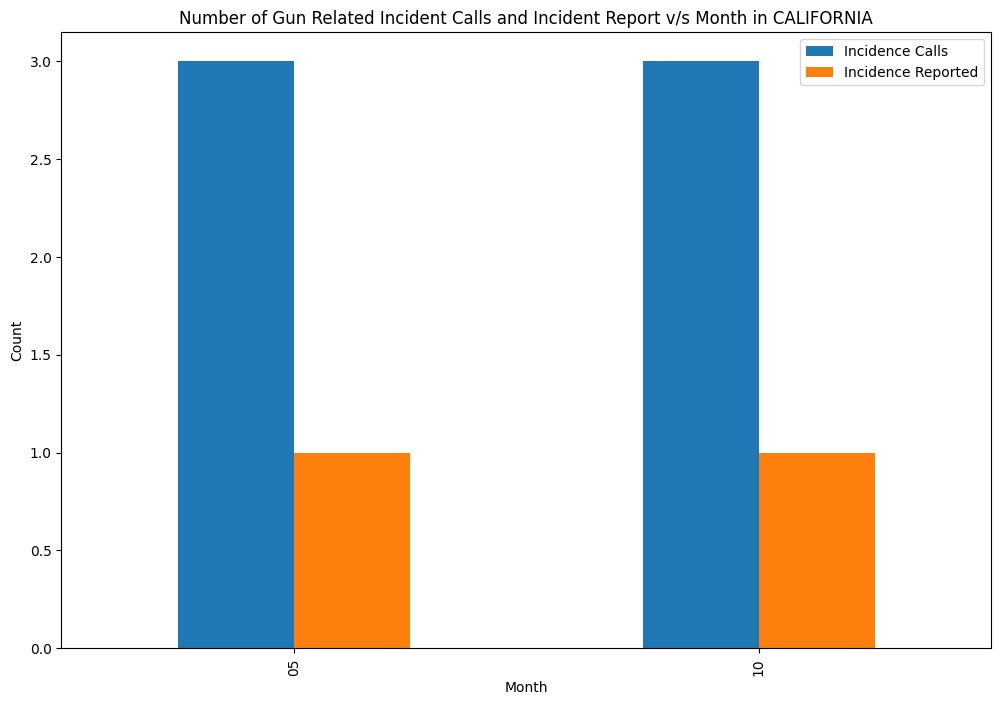

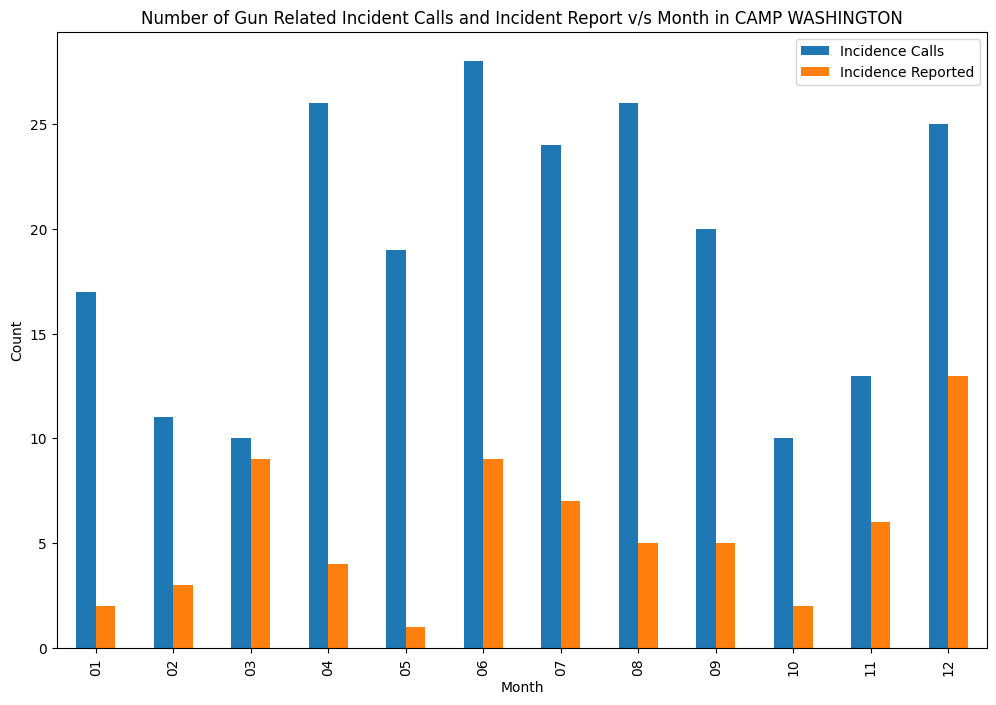

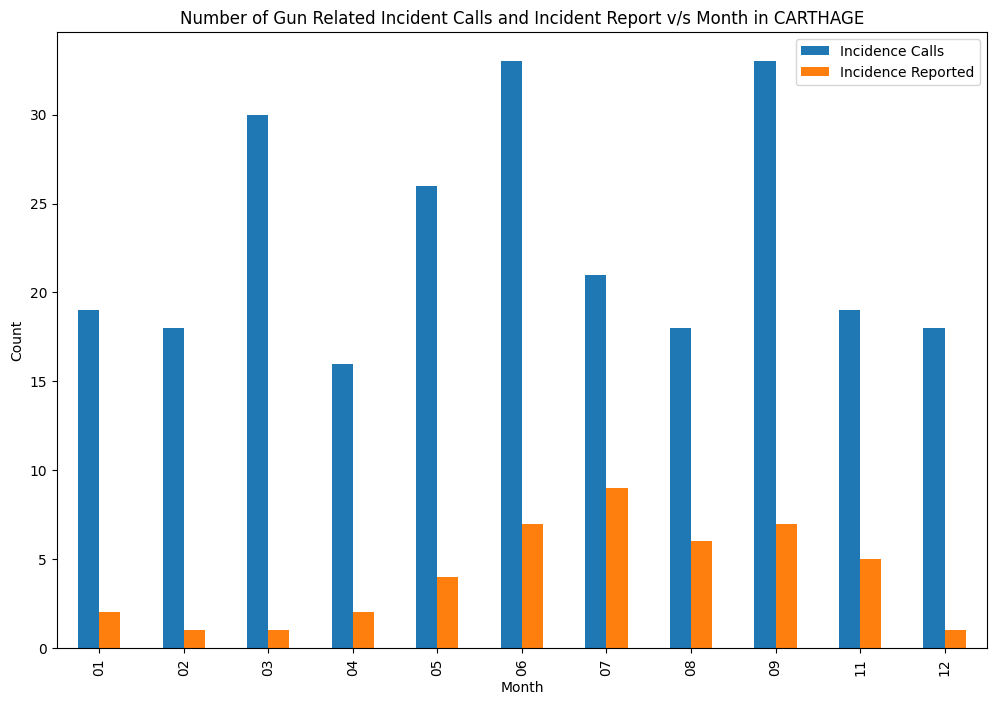

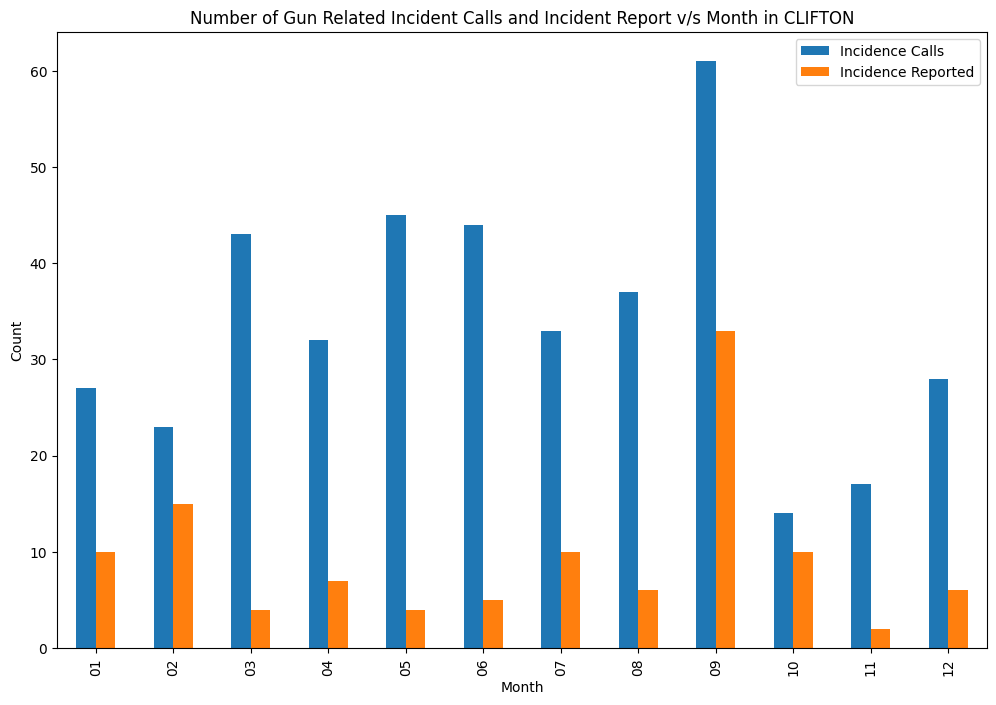

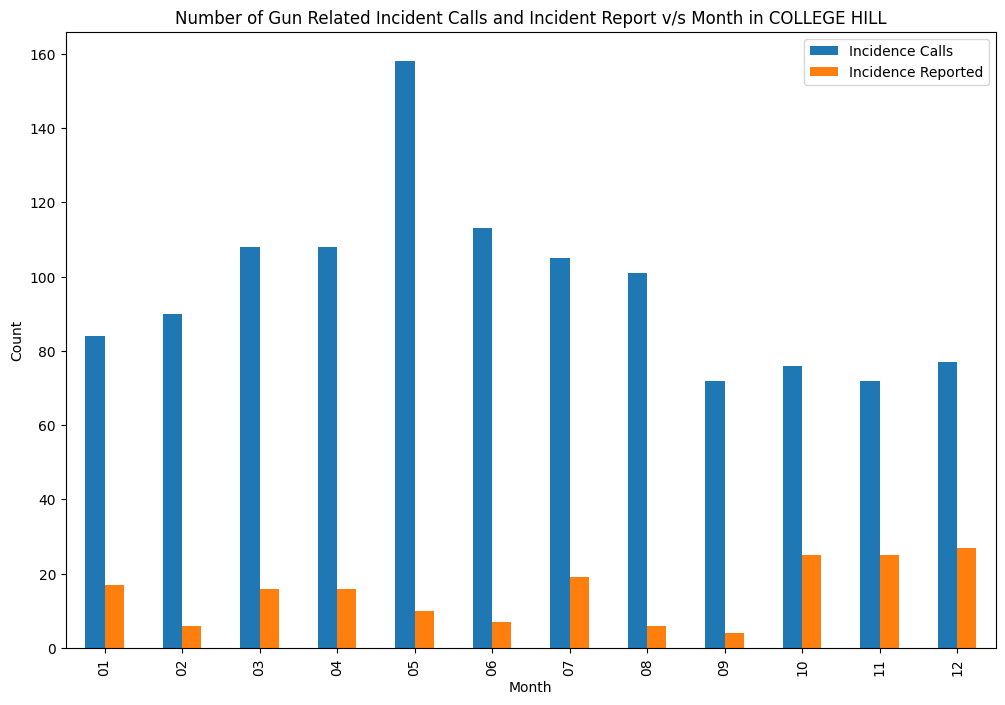

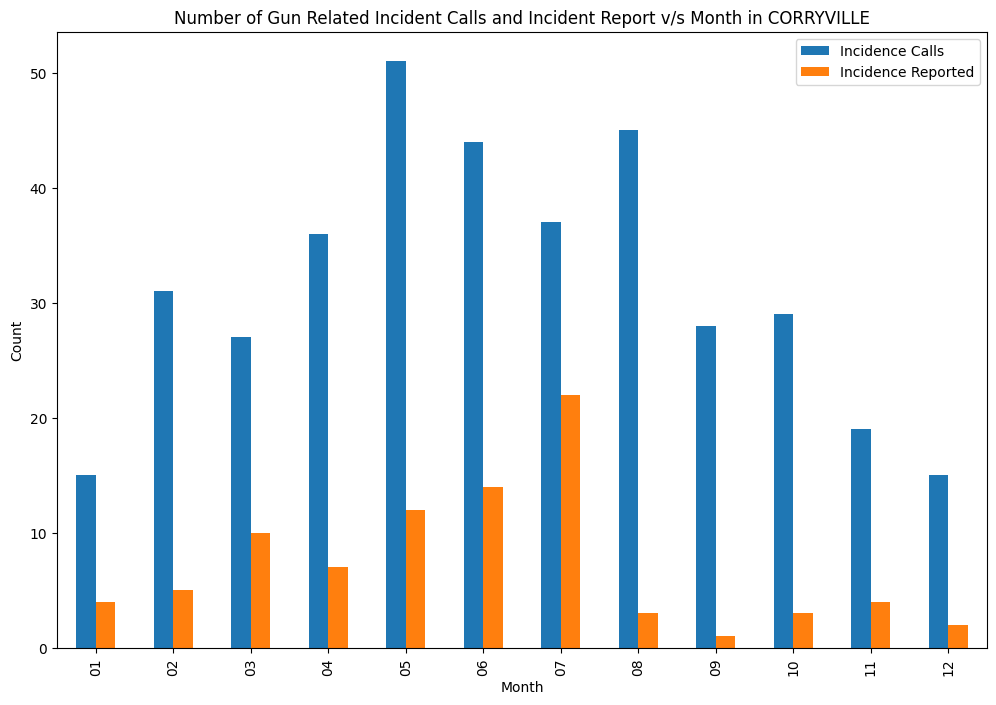

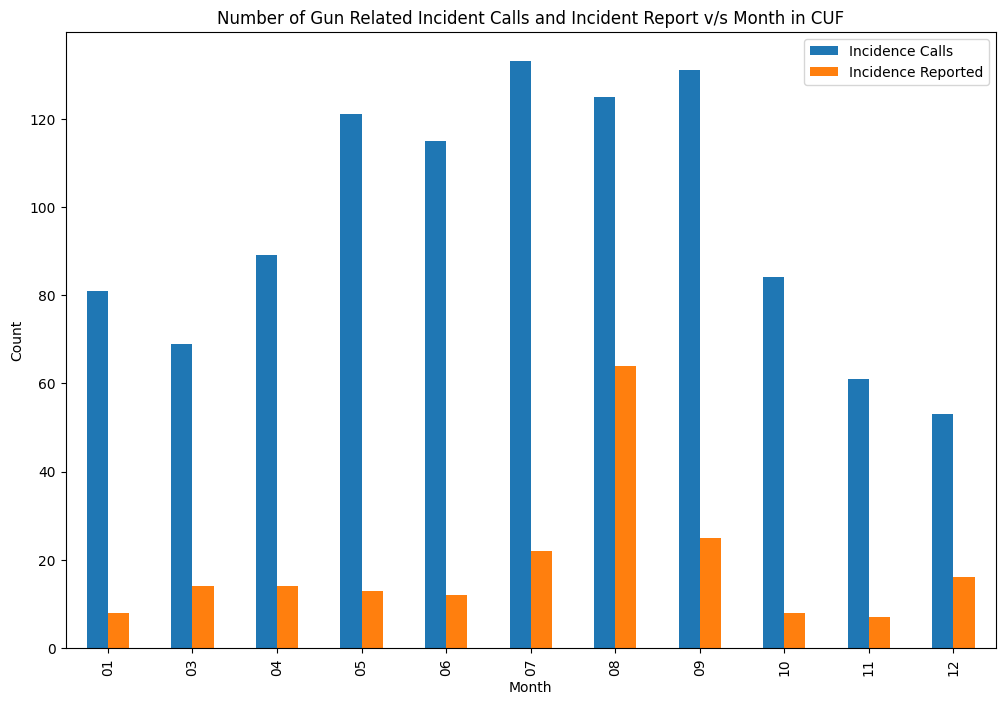

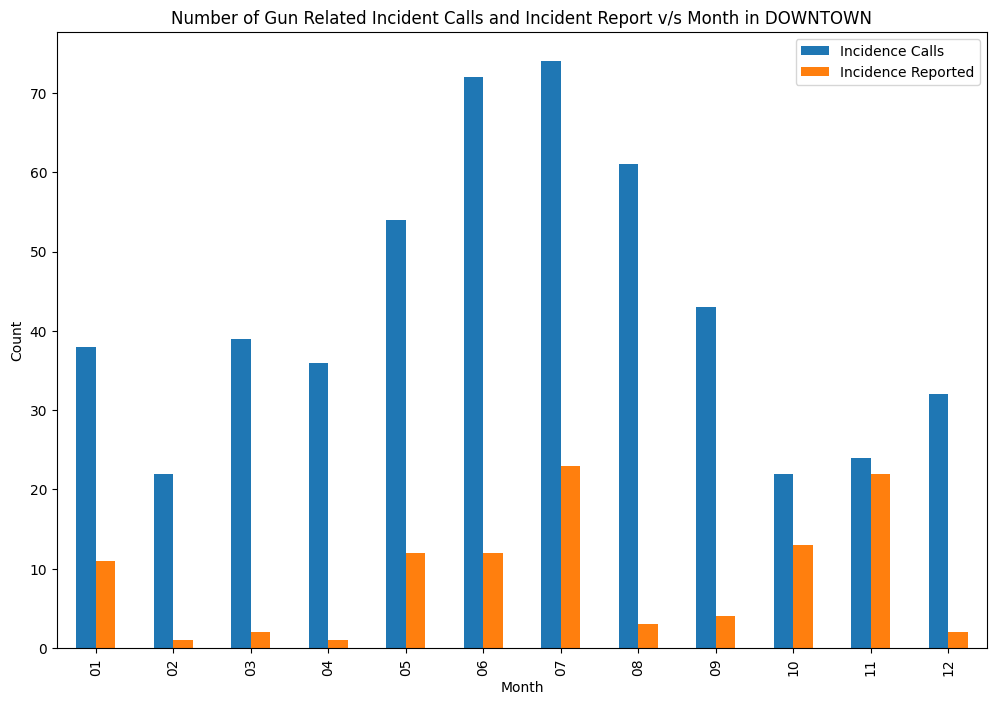

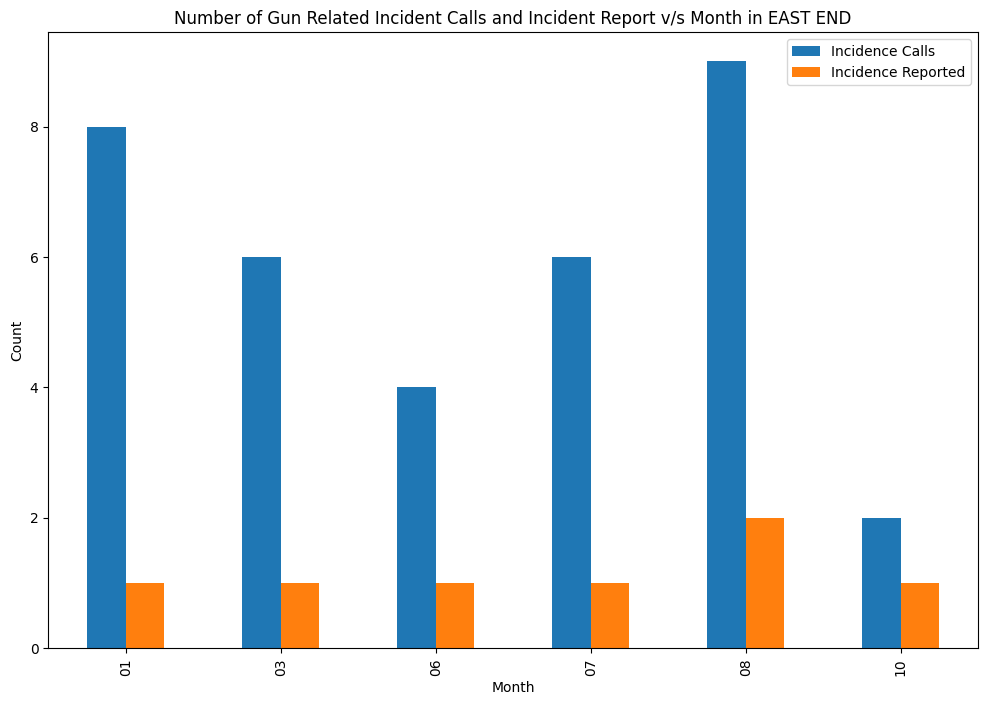

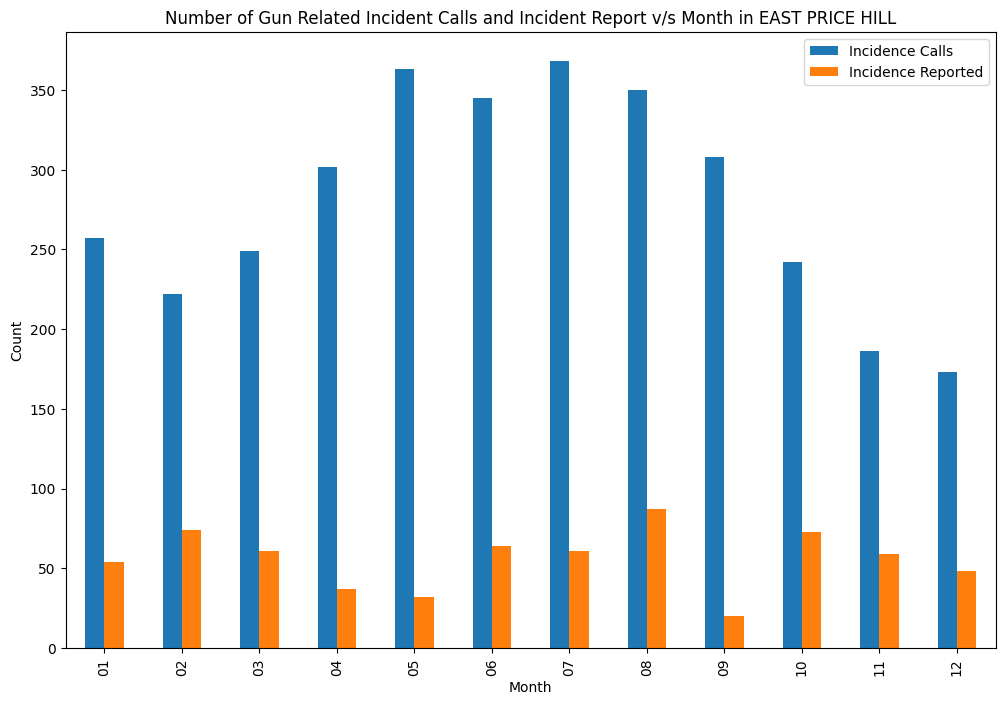

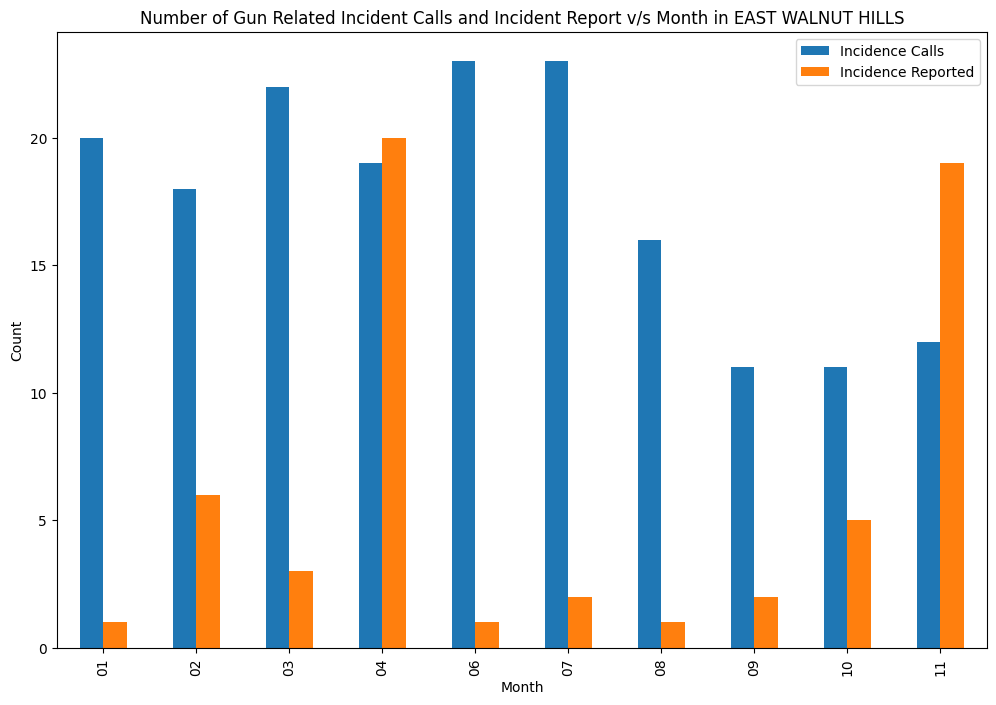

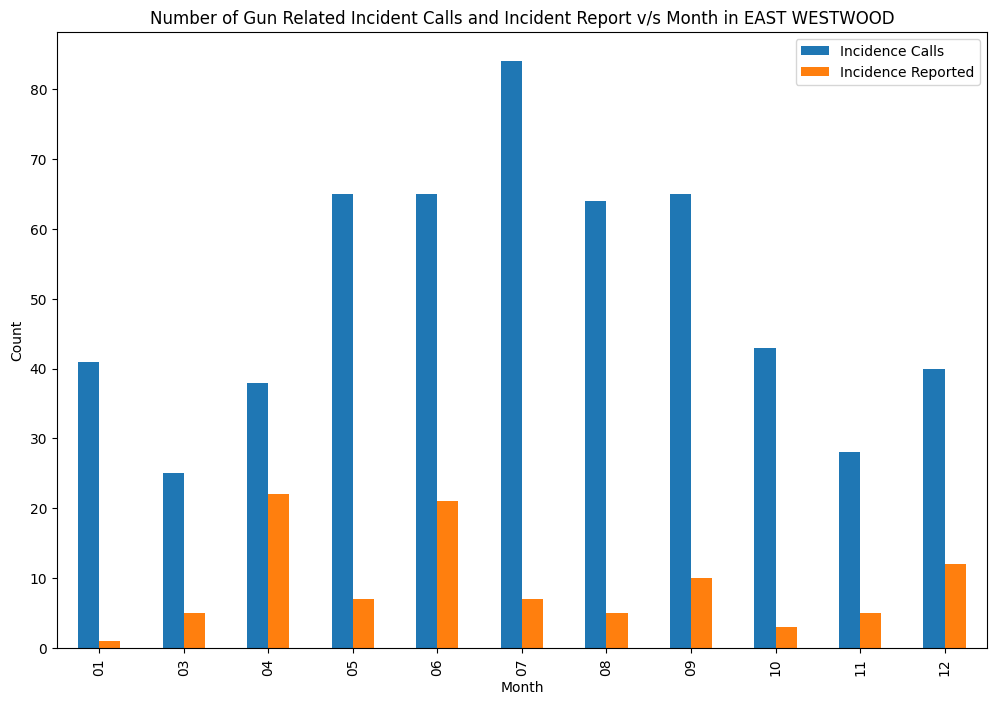

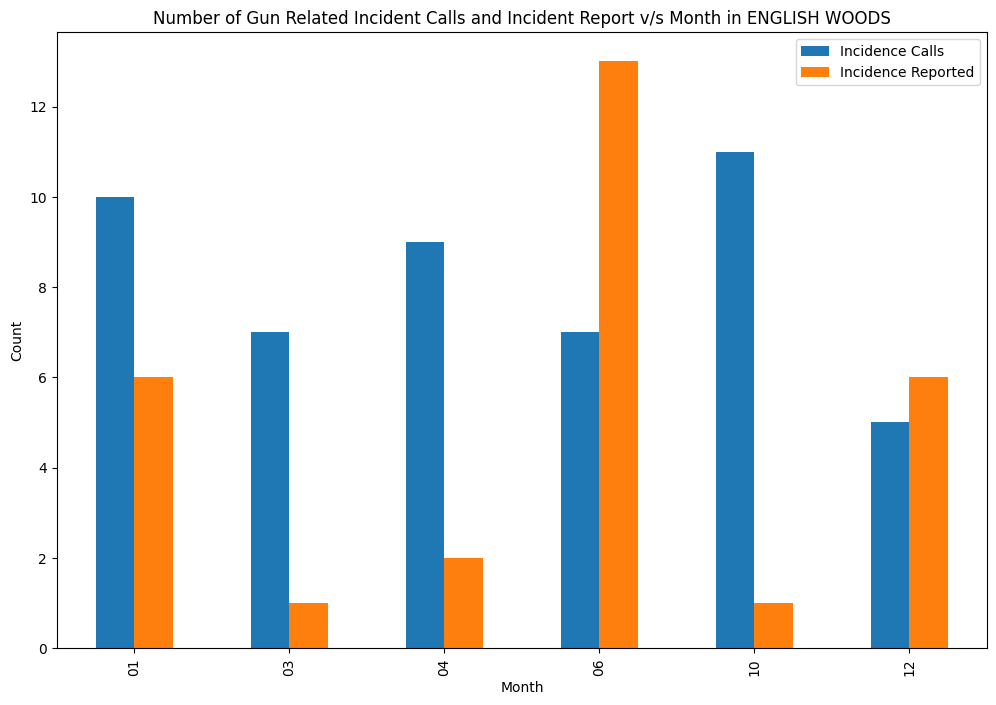

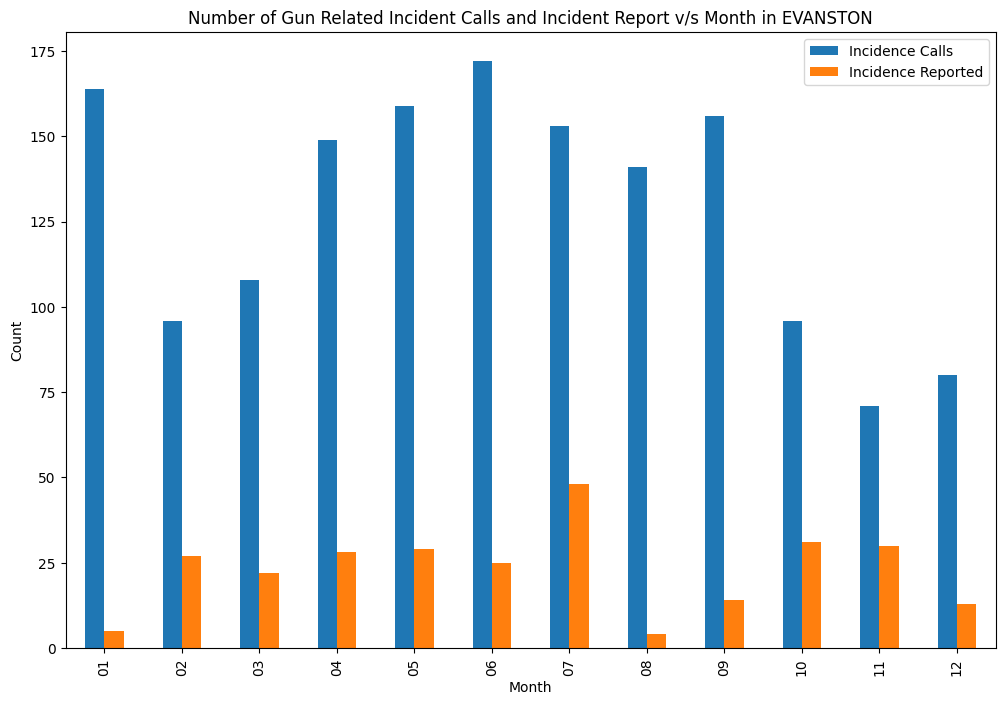

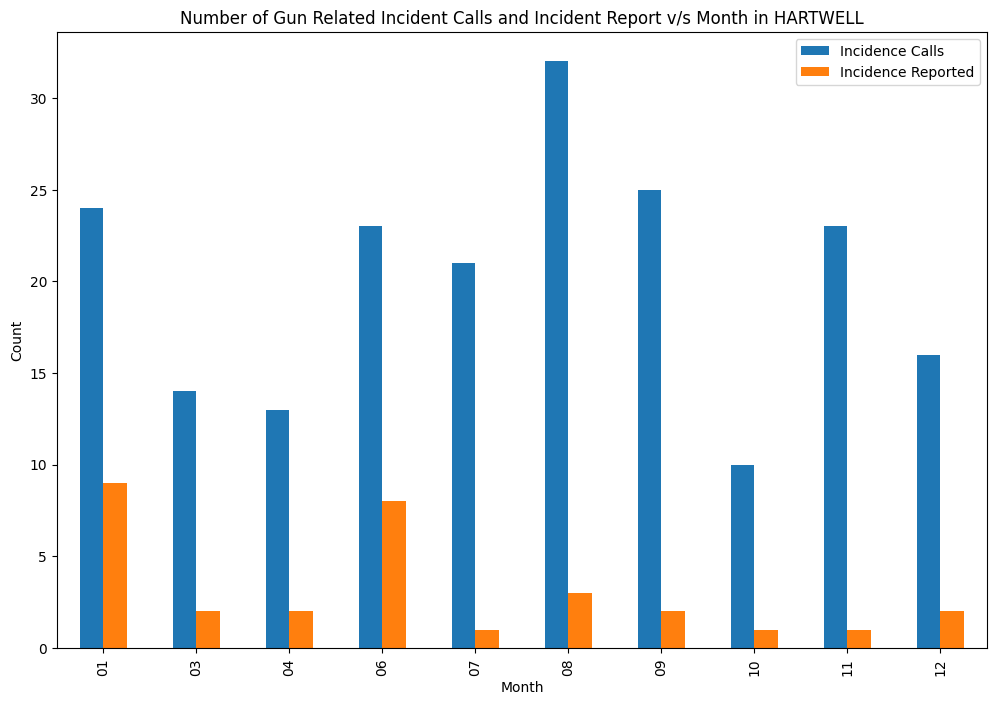

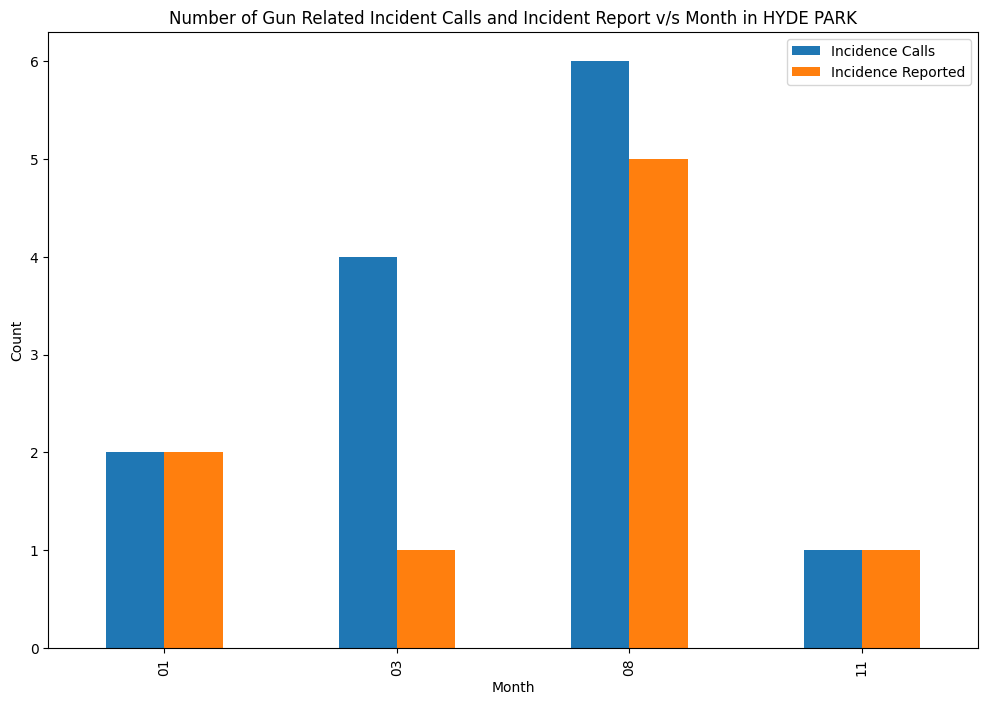

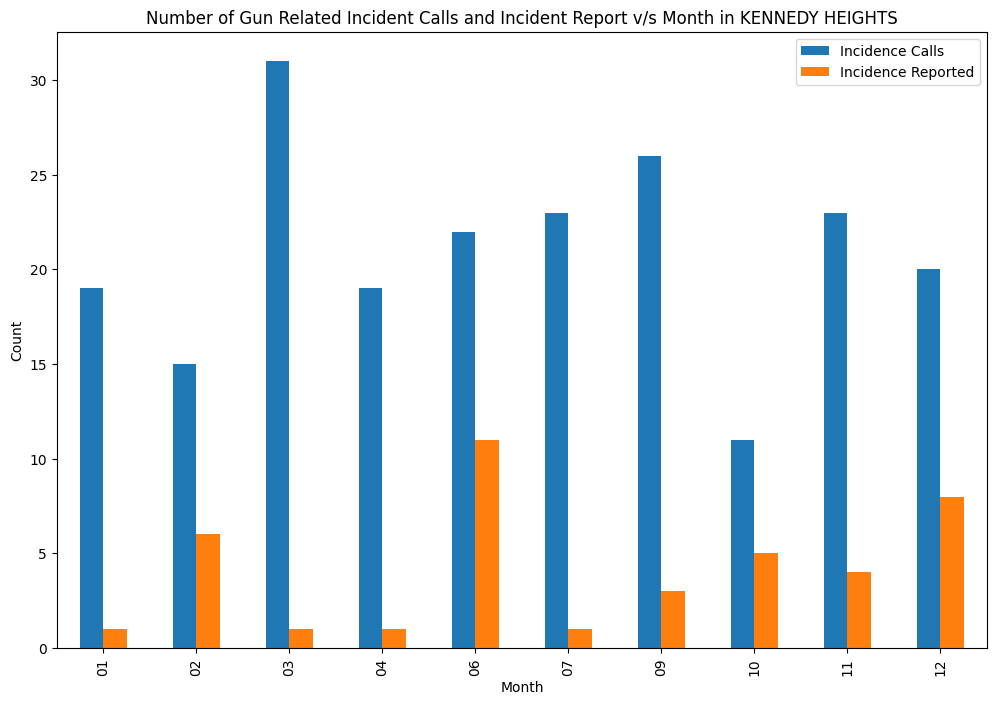

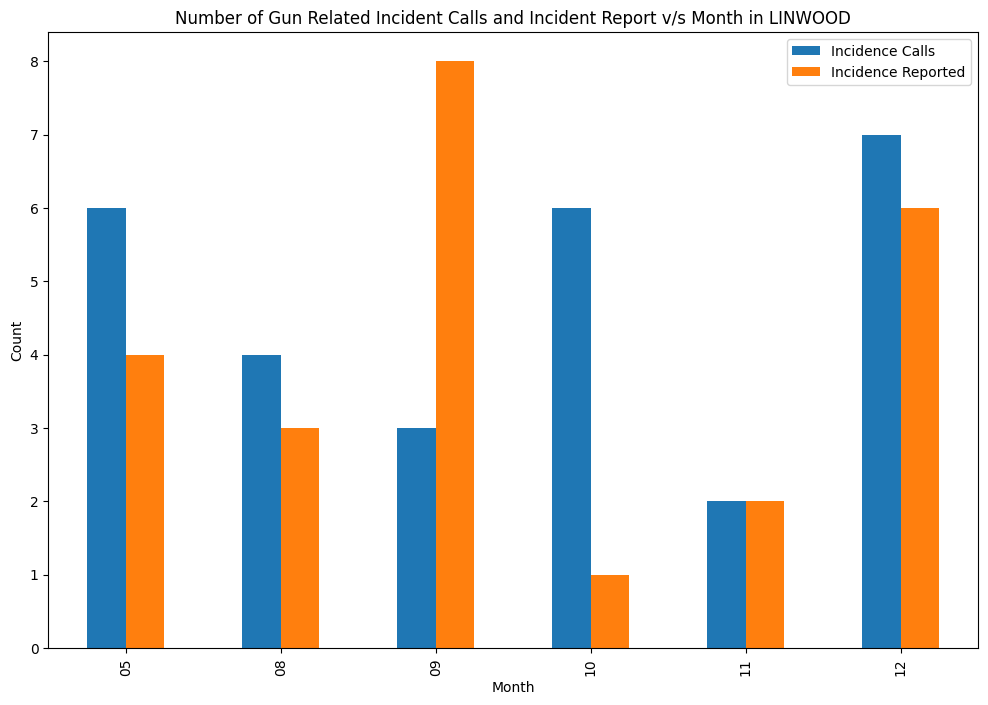

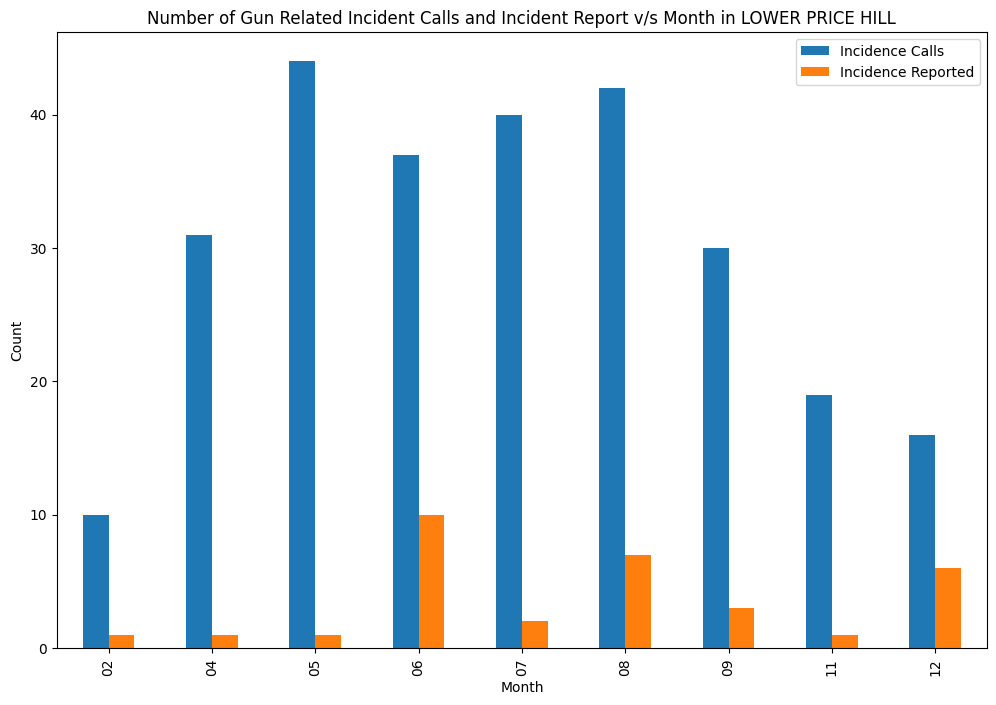

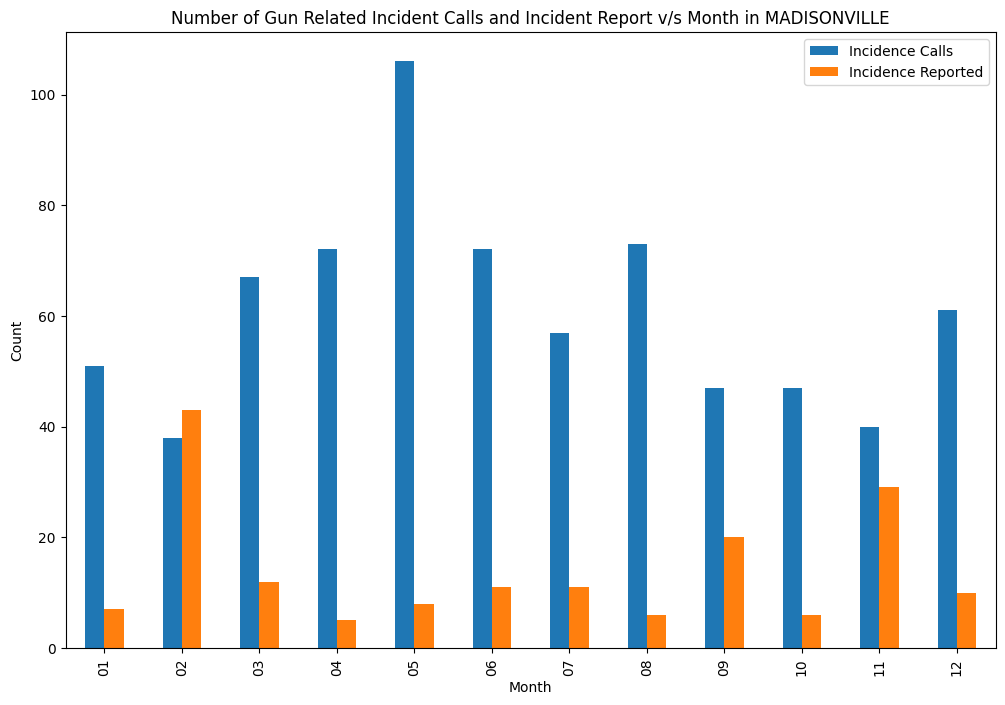

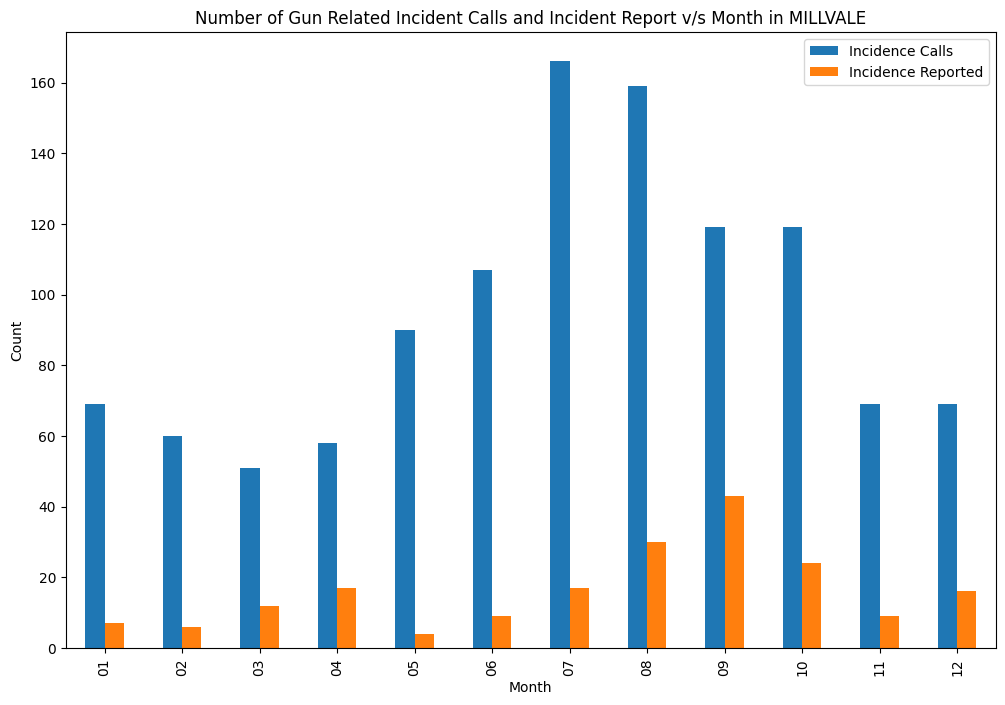

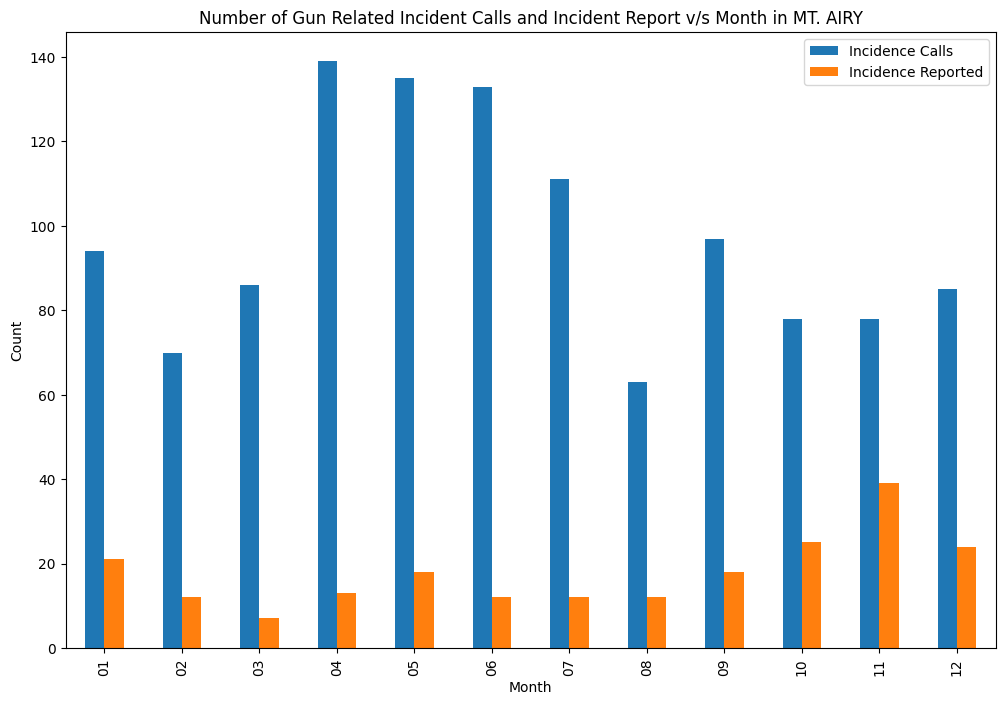

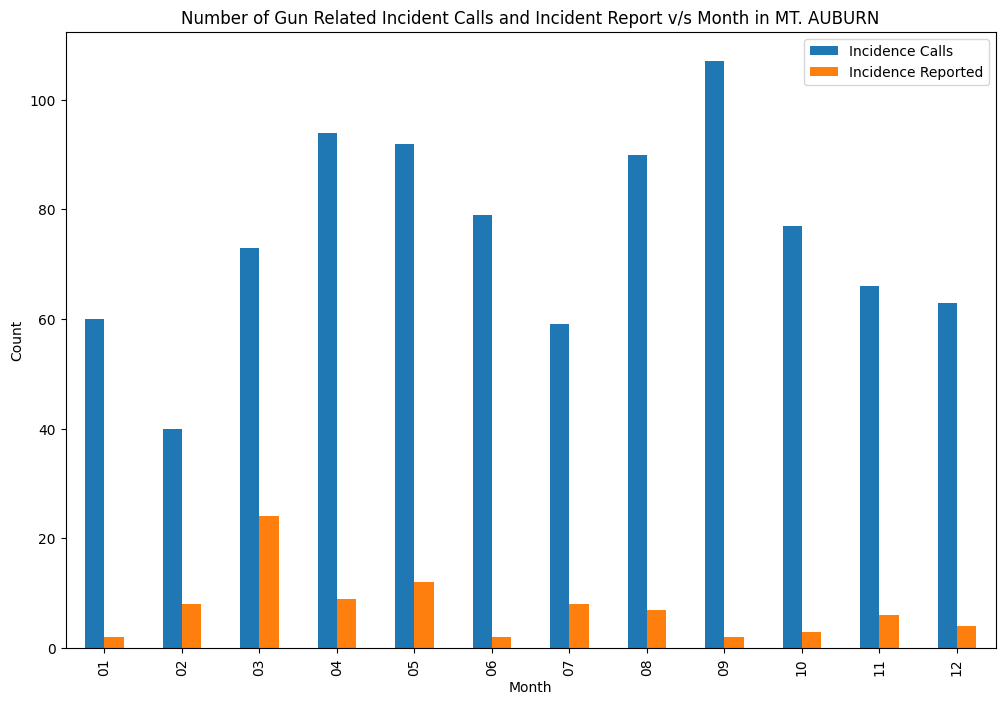

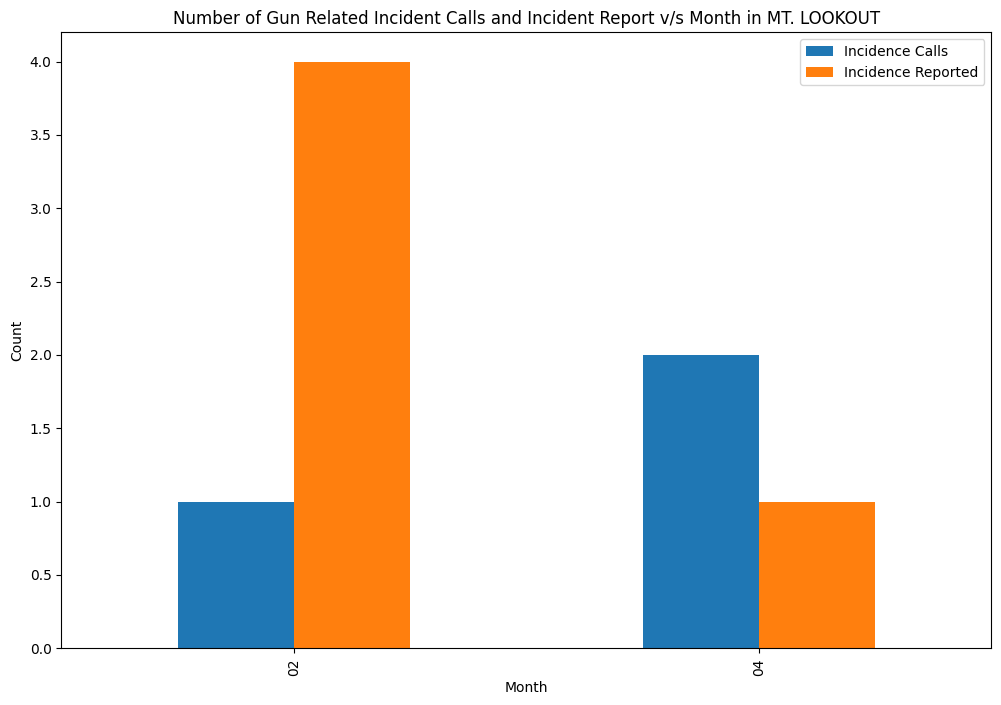

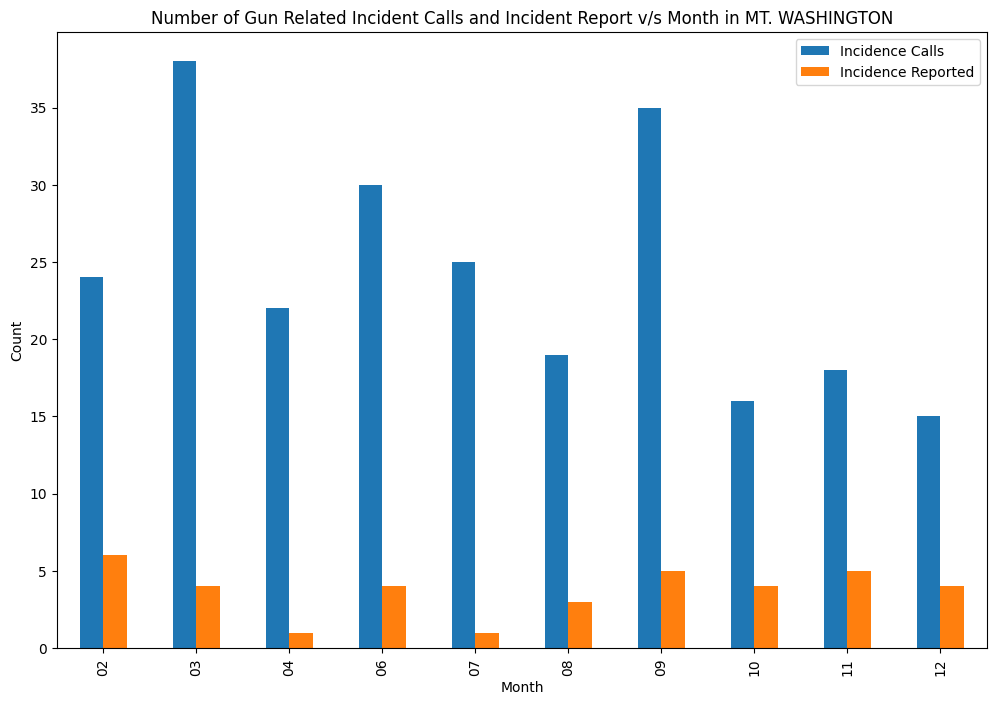

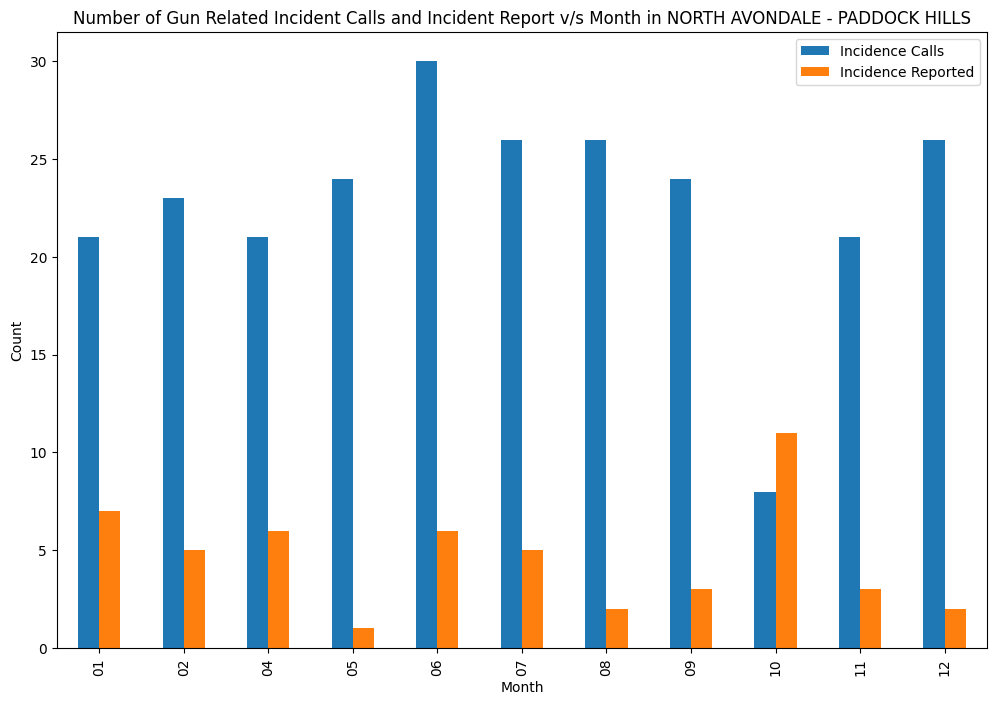

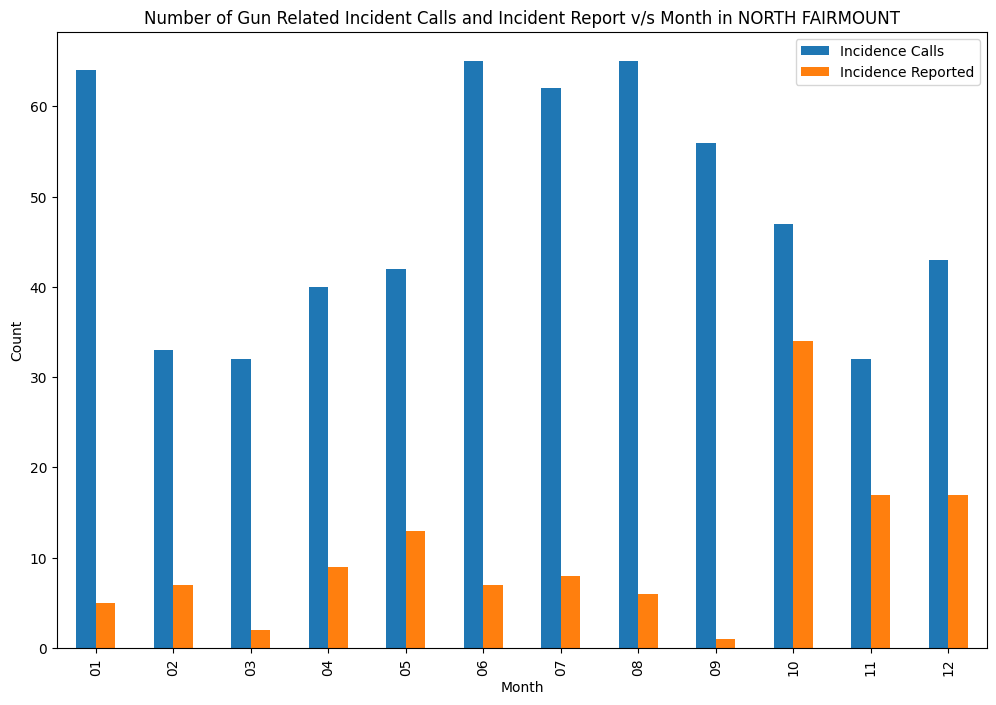

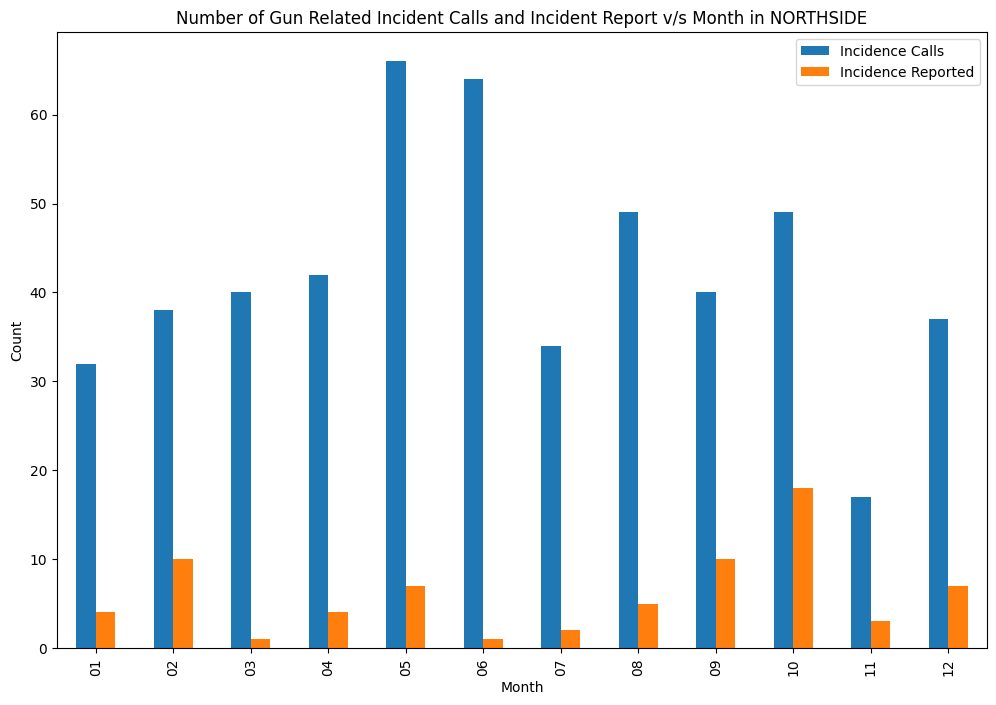

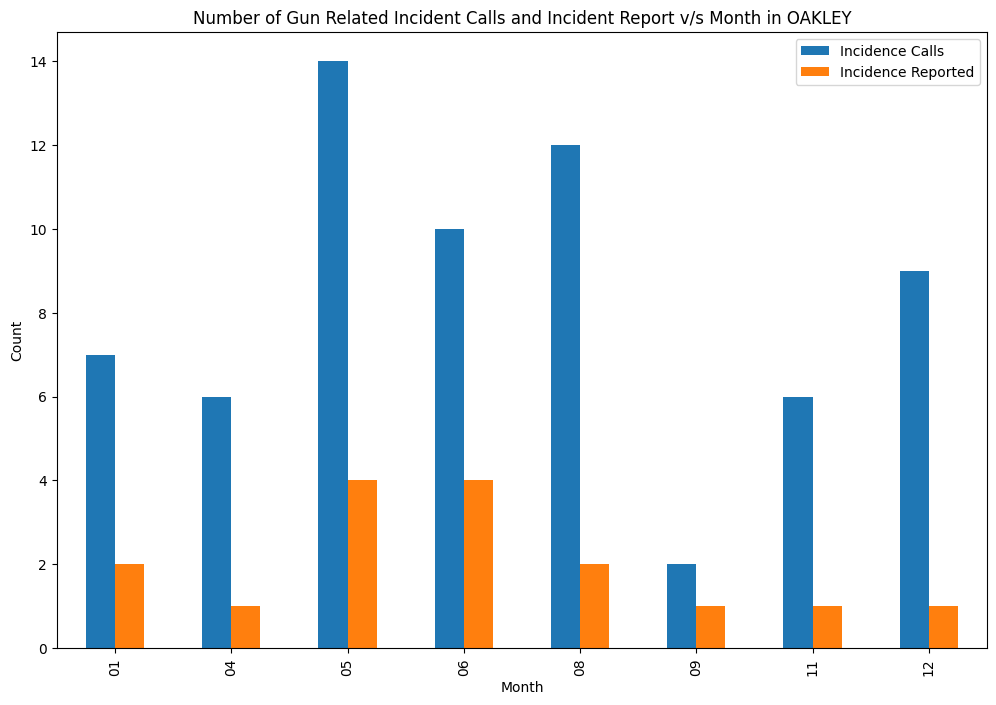

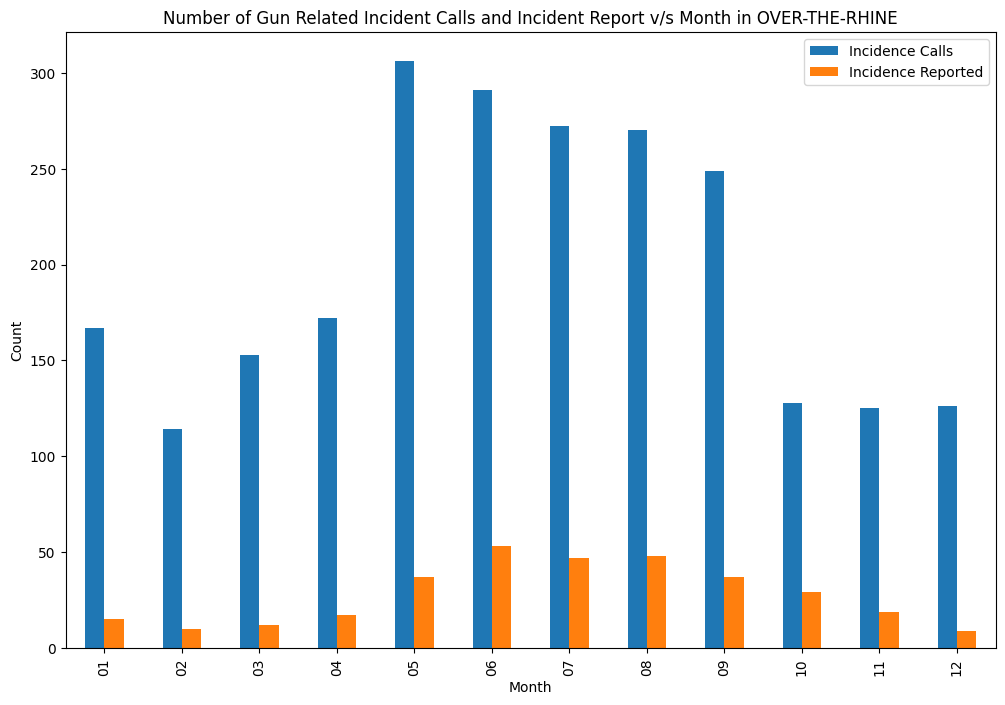

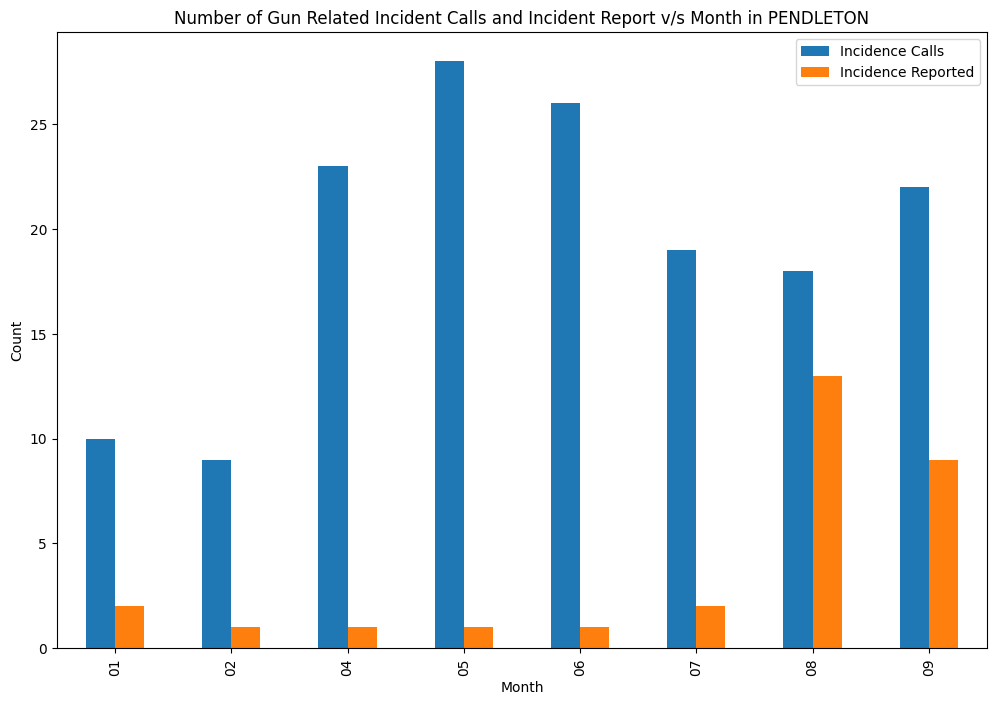

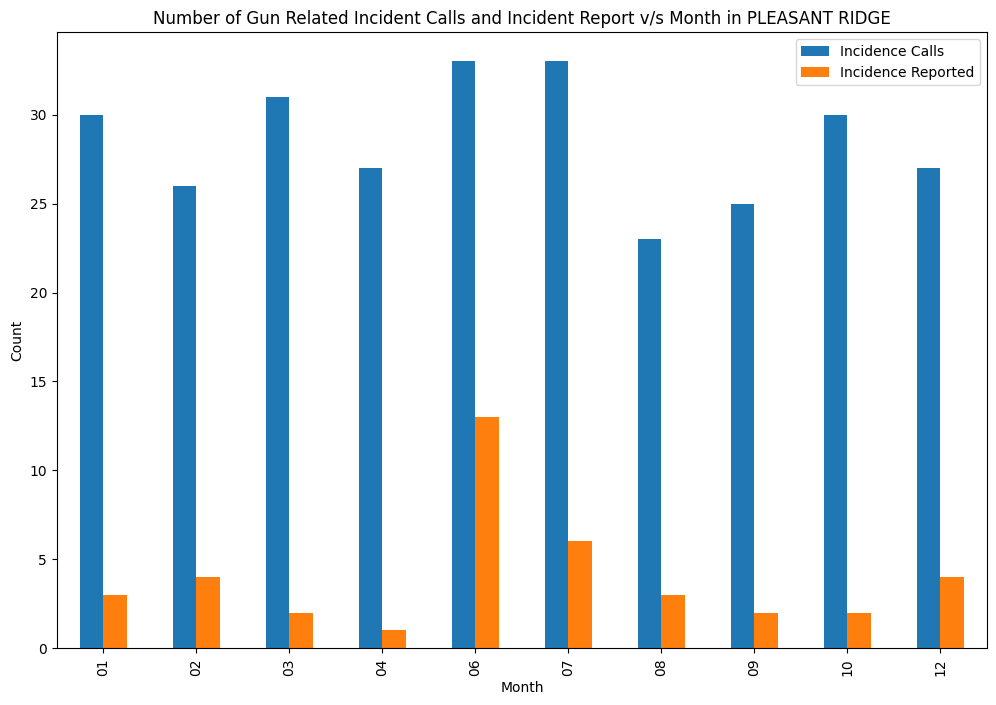

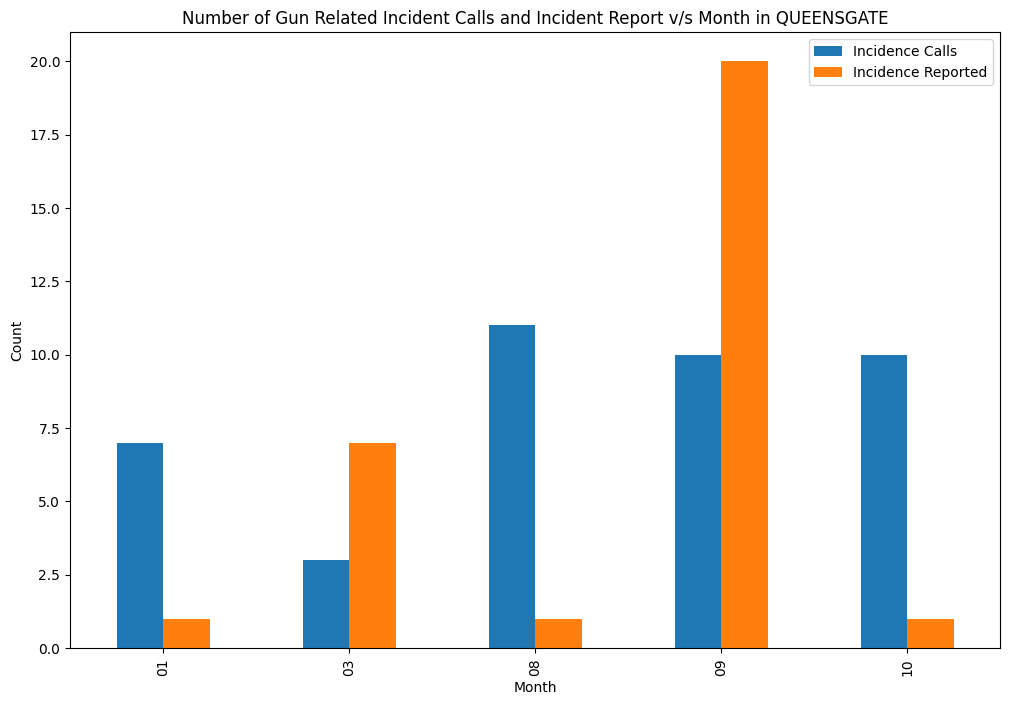

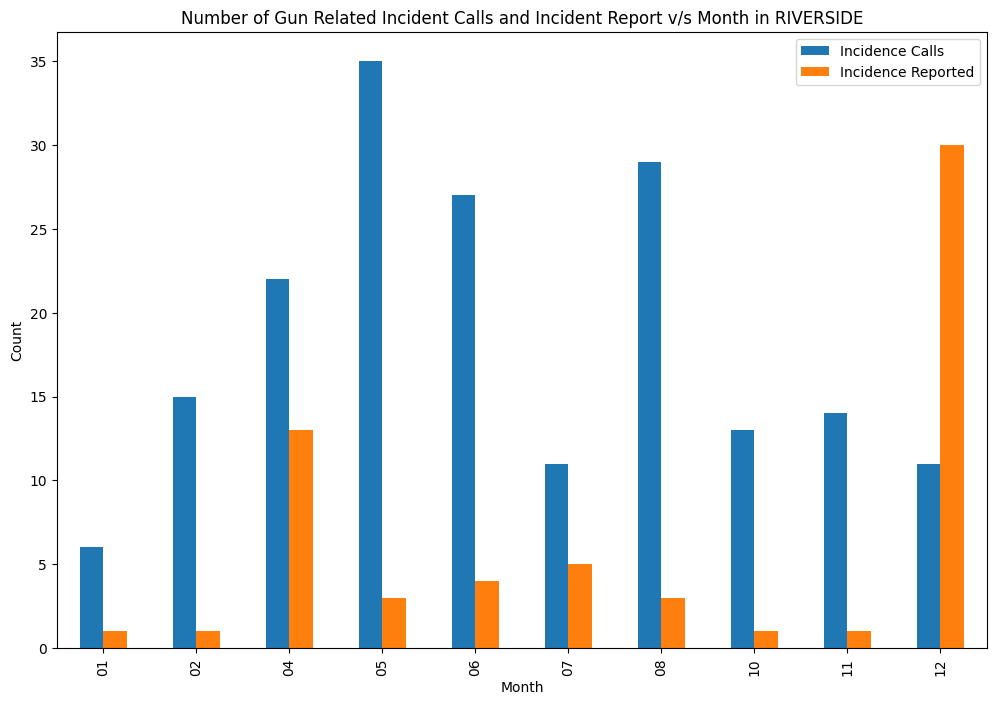

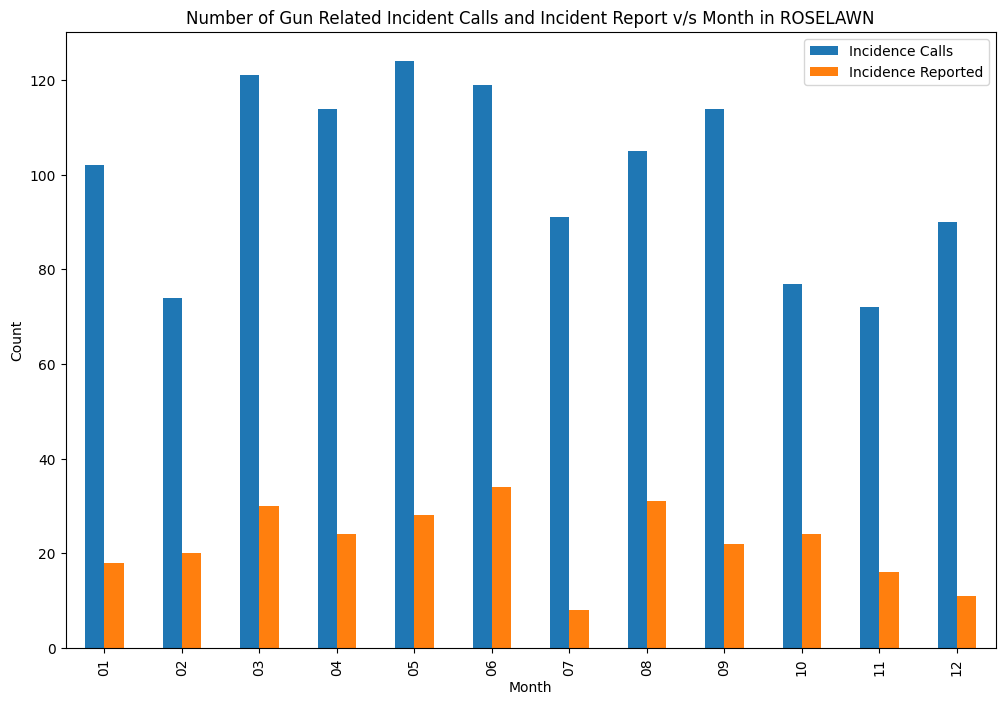

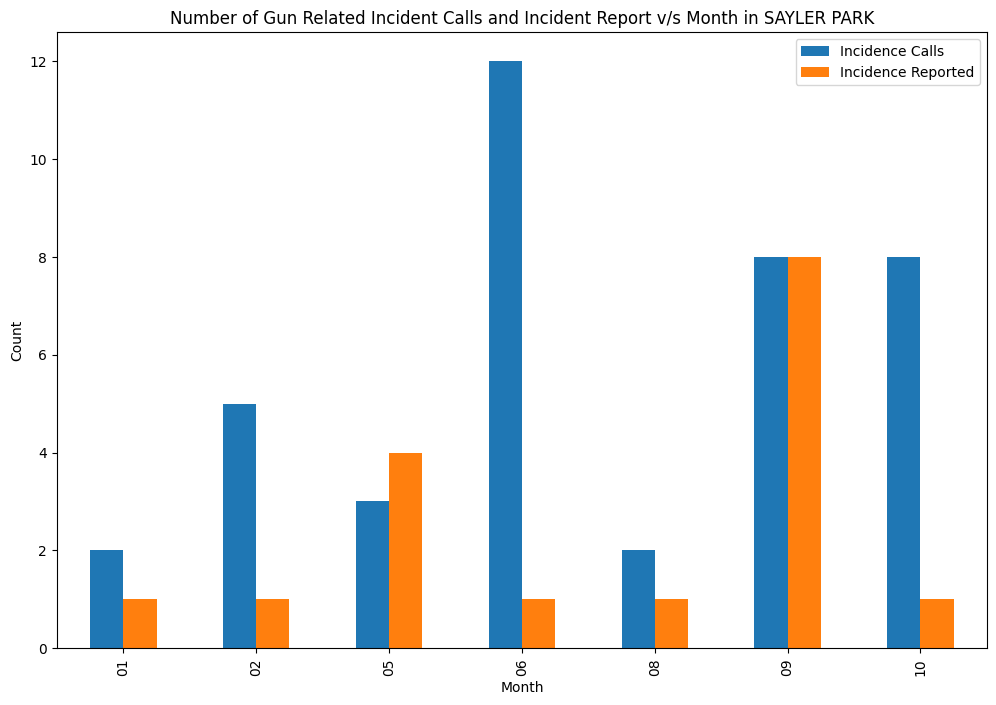

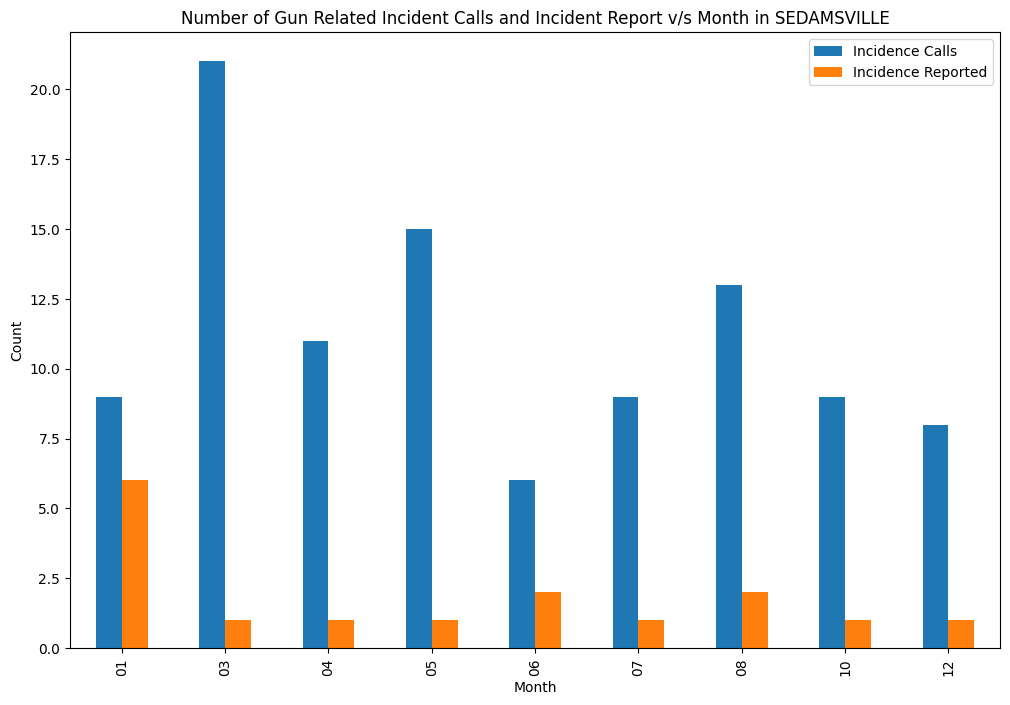

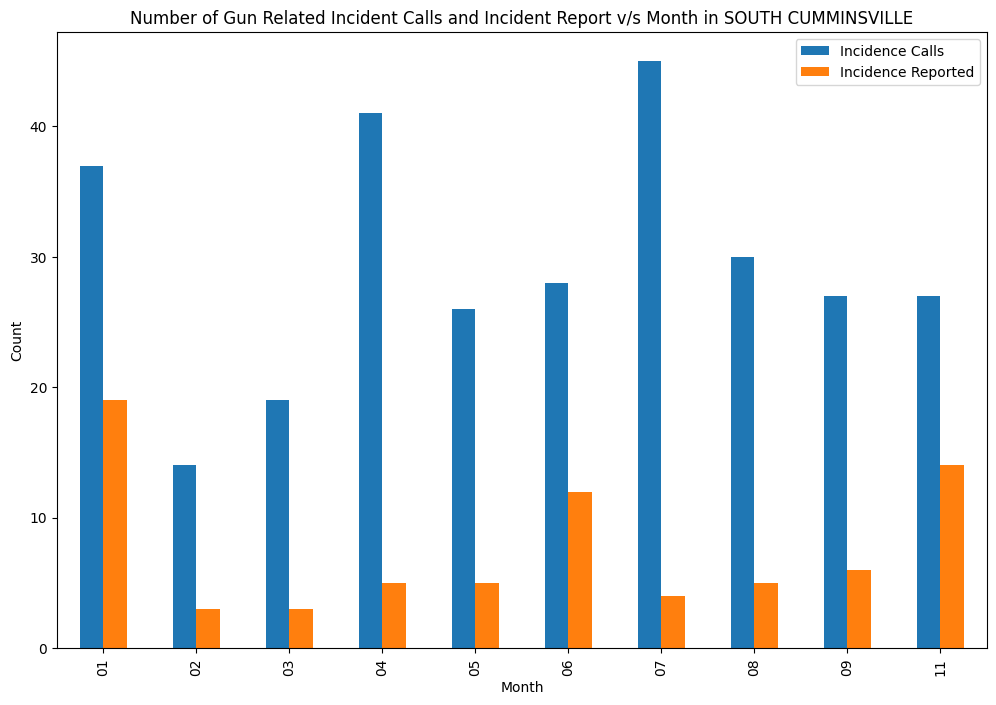

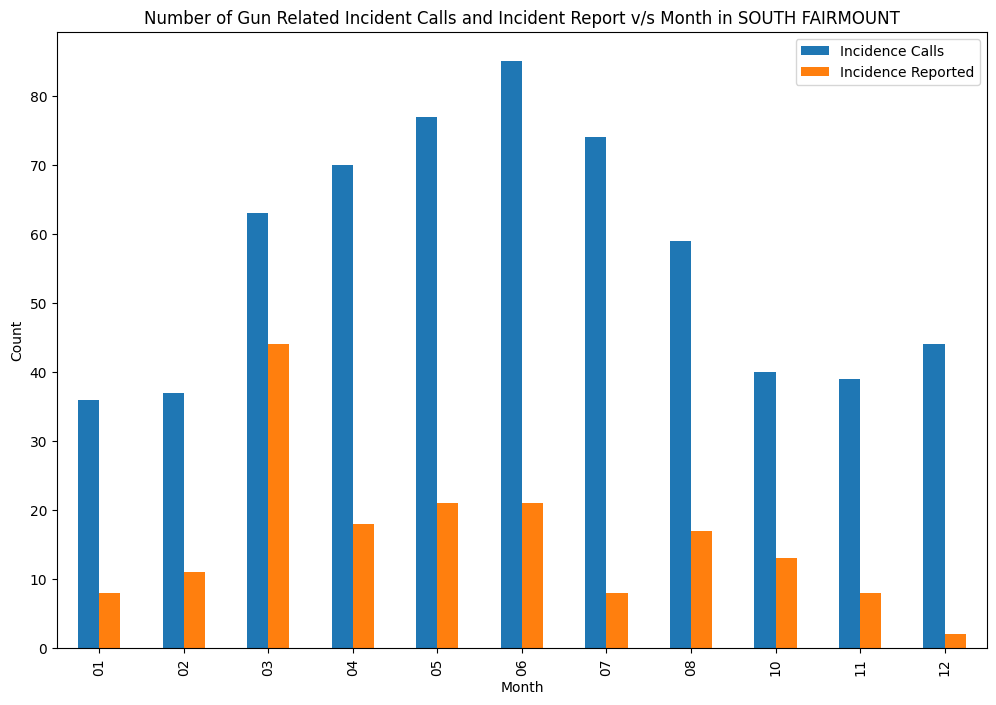

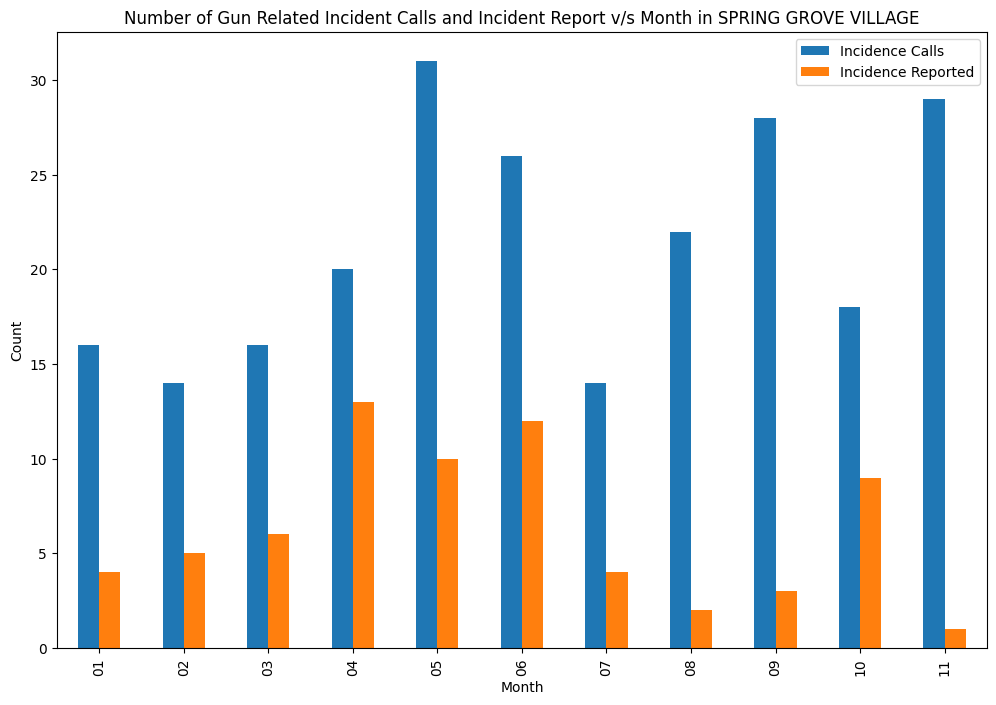

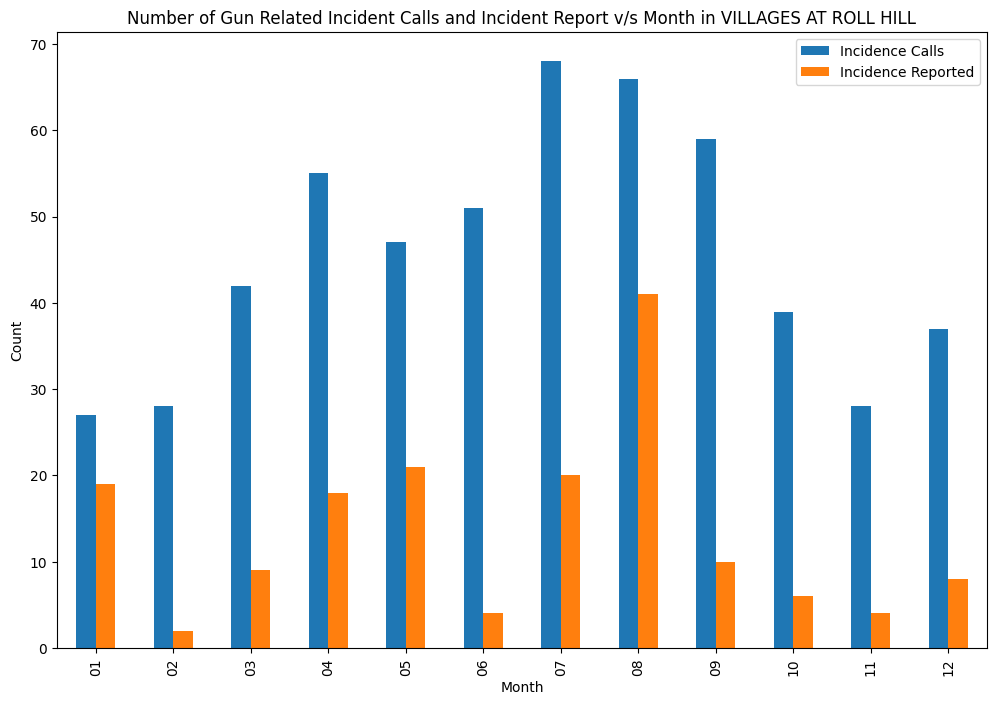

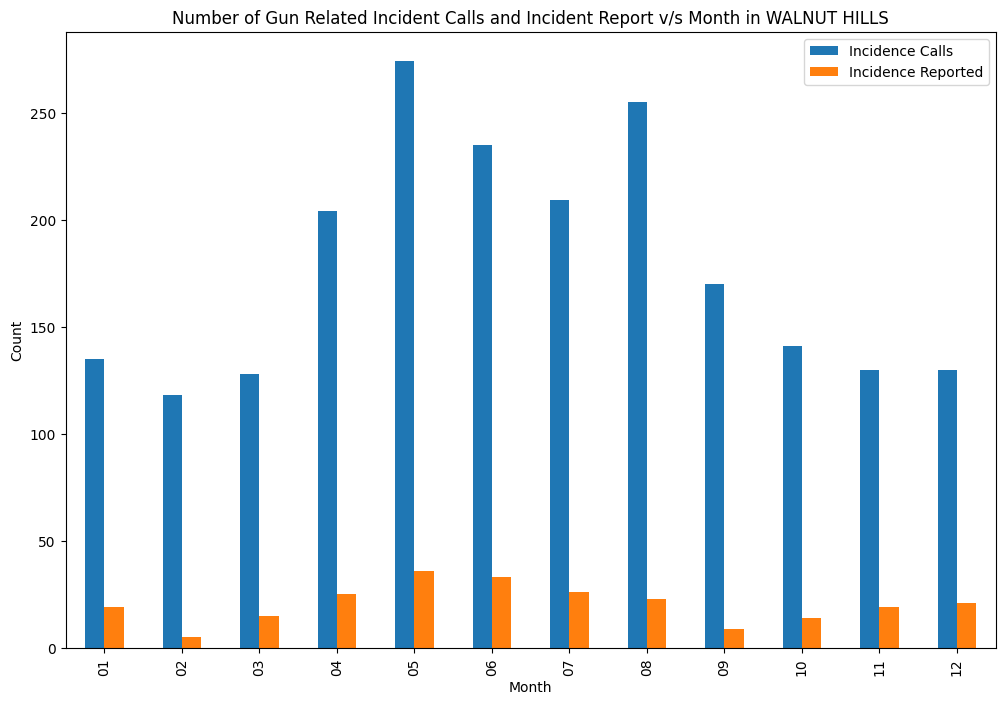

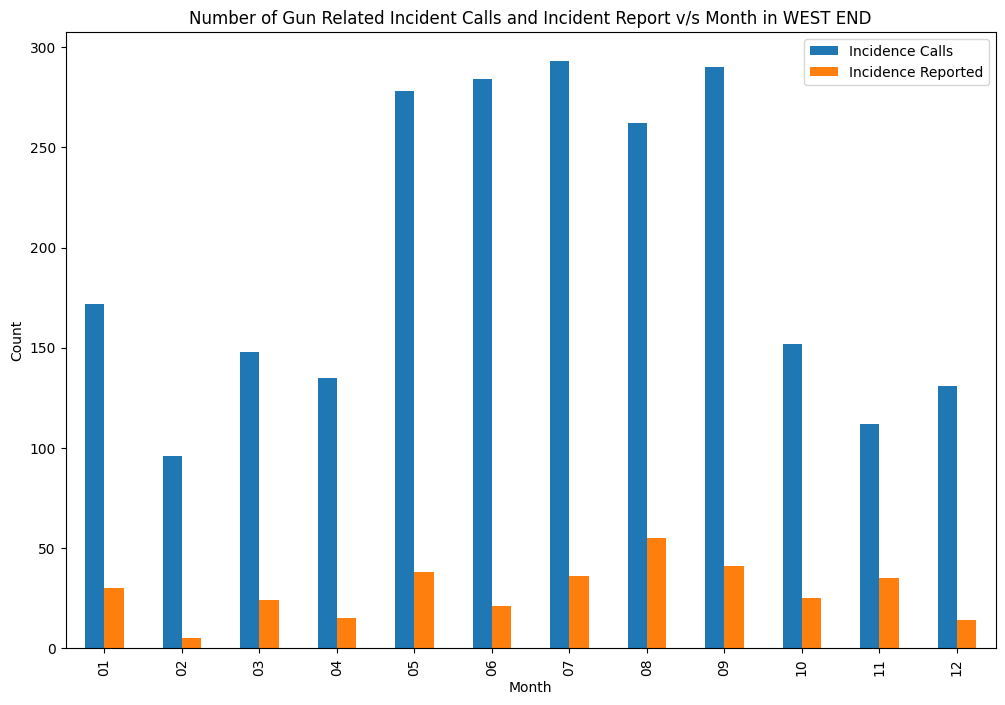

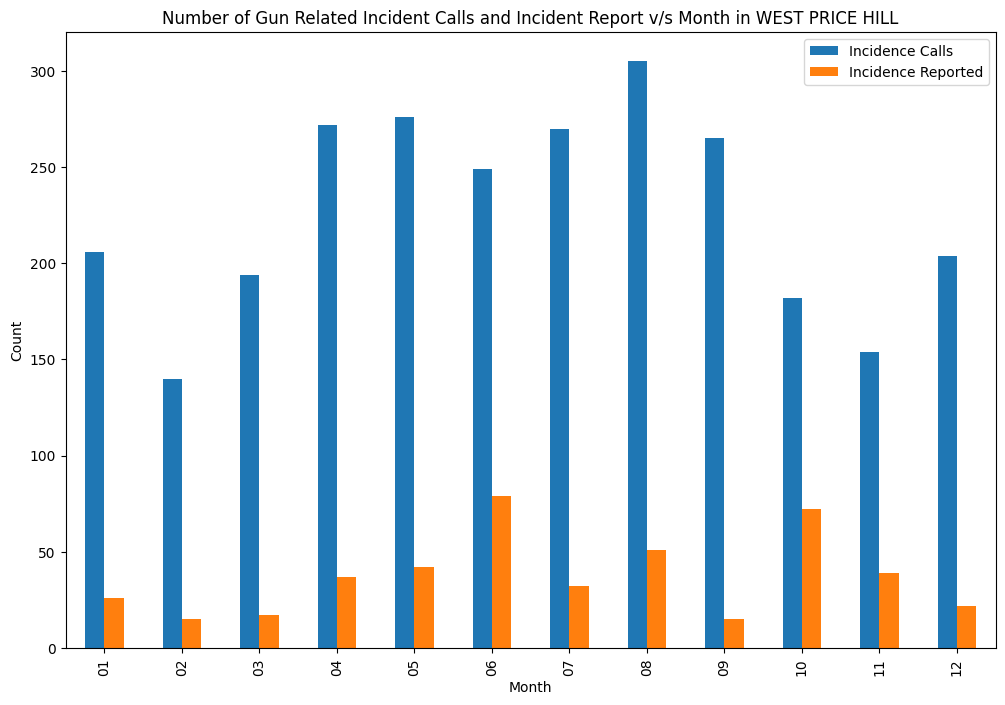

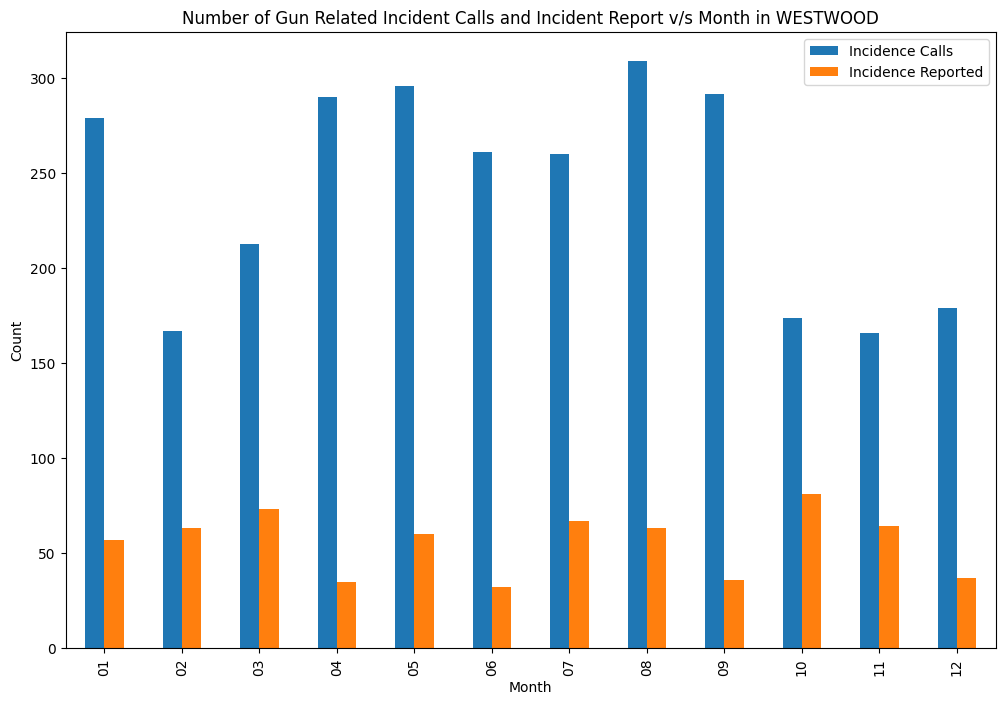

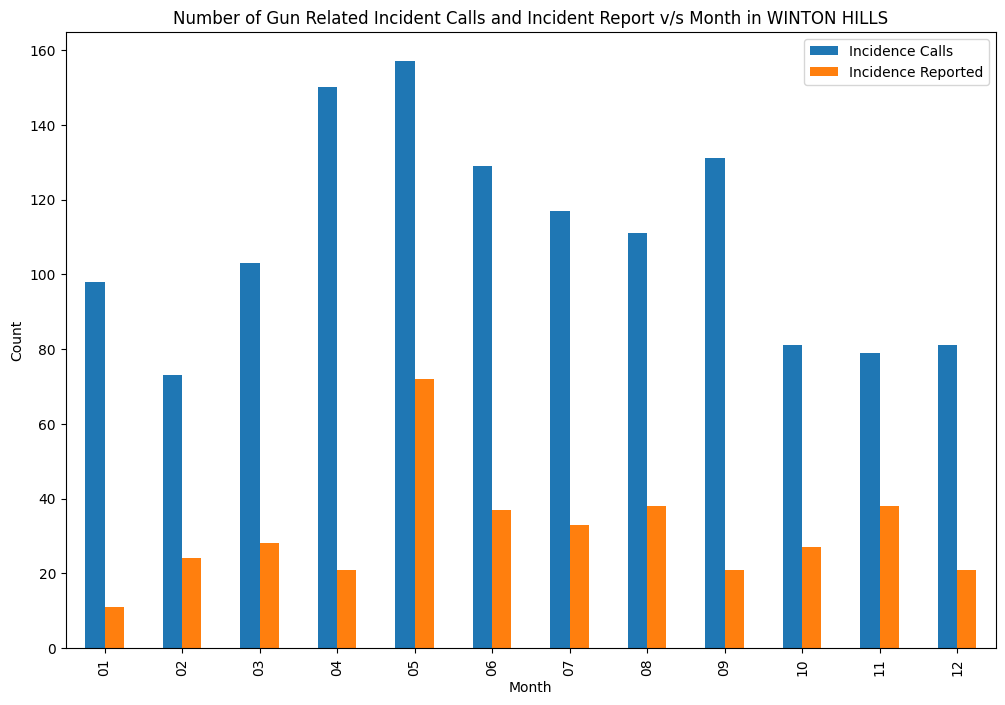

In [262]:
#k = 0
for i in neighborhood_plot: 
        k = k + 1
        df_report = gun_incident.loc[(gun_incident['SNA_NEIGHBORHOOD'] == i) ].copy()
        df_report = pd.DataFrame(df_report.groupby(['Month']).size())
        df_report
        #value_counts_j = pd.DataFrame(gun_incident.groupby(['Month']).size())
        df_incident = df_sample.loc[(df_calls['SNA_NEIGHBORHOOD'] == i) ].copy()
        df_incident = pd.DataFrame(df_incident.groupby(['Month']).size())
        df_combined = pd.merge(df_incident, df_report,right_index = True, left_index = True)
        df_combined
        titlez = "Number of Gun Related Incident Calls and Incident Report v/s Month in " + i
        pic_title = i + ".png"
        plot2 = df_combined.plot(kind = 'bar',figsize = (12,8), xlabel = "Month", ylabel = "Count", title = titlez)
        plot2.legend(["Incidence Calls","Incidence Reported"])
        #plot2.legend( bbox_to_anchor=(1, 1), loc='upper left')
        figure = plot2.figure
        
        
        figure.savefig(pic_title)

In [220]:
#print(k)

48
